In [74]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


In [75]:
# general overview
df_student = pd.read_csv("./data/StudentPerformanceFactors.csv")
student = df_student.copy()     #por si a caso
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [76]:
student.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [77]:
student.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [78]:
columnas = student.columns

In [79]:
# Dispercion de datos
columnas_eligidas = ['Parental_Involvement',
       'Access_to_Resources', 'Motivation_Level', 
       'Family_Income', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 
       'Parental_Education_Level', 'Distance_from_Home']
for col in columnas_eligidas:
    print(f"Para '{col}', la distribución es:")
    print(student[col].value_counts())
    print("*"*10)

Para 'Parental_Involvement', la distribución es:
Parental_Involvement
Medium    3362
High      1908
Low       1337
Name: count, dtype: int64
**********
Para 'Access_to_Resources', la distribución es:
Access_to_Resources
Medium    3319
High      1975
Low       1313
Name: count, dtype: int64
**********
Para 'Motivation_Level', la distribución es:
Motivation_Level
Medium    3351
Low       1937
High      1319
Name: count, dtype: int64
**********
Para 'Family_Income', la distribución es:
Family_Income
Low       2672
Medium    2666
High      1269
Name: count, dtype: int64
**********
Para 'School_Type', la distribución es:
School_Type
Public     4598
Private    2009
Name: count, dtype: int64
**********
Para 'Peer_Influence', la distribución es:
Peer_Influence
Positive    2638
Neutral     2592
Negative    1377
Name: count, dtype: int64
**********
Para 'Physical_Activity', la distribución es:
Physical_Activity
3    2545
2    1627
4    1575
1     421
5     361
0      46
6      32
Name: count, dt

In [6]:
# Cardinalidad
diccionario_cardinalidad = {}
for col in columnas:
    cardinalidad = round(student[col].nunique()/len(student)*100,2)
    print(f"Para '{col}' la cardinalidad es:", cardinalidad )
    diccionario_cardinalidad[col] = cardinalidad



Para 'Hours_Studied' la cardinalidad es: 0.62
Para 'Attendance' la cardinalidad es: 0.62
Para 'Parental_Involvement' la cardinalidad es: 0.05
Para 'Access_to_Resources' la cardinalidad es: 0.05
Para 'Extracurricular_Activities' la cardinalidad es: 0.03
Para 'Sleep_Hours' la cardinalidad es: 0.11
Para 'Previous_Scores' la cardinalidad es: 0.77
Para 'Motivation_Level' la cardinalidad es: 0.05
Para 'Internet_Access' la cardinalidad es: 0.03
Para 'Tutoring_Sessions' la cardinalidad es: 0.14
Para 'Family_Income' la cardinalidad es: 0.05
Para 'Teacher_Quality' la cardinalidad es: 0.05
Para 'School_Type' la cardinalidad es: 0.03
Para 'Peer_Influence' la cardinalidad es: 0.05
Para 'Physical_Activity' la cardinalidad es: 0.11
Para 'Learning_Disabilities' la cardinalidad es: 0.03
Para 'Parental_Education_Level' la cardinalidad es: 0.05
Para 'Distance_from_Home' la cardinalidad es: 0.05
Para 'Gender' la cardinalidad es: 0.03
Para 'Exam_Score' la cardinalidad es: 0.68


In [9]:
for clave, valor in diccionario_cardinalidad.items():
    if diccionario_cardinalidad[clave] >= 0.3:
        print(clave, ":" ,diccionario_cardinalidad[clave])

Hours_Studied : 0.62
Attendance : 0.62
Previous_Scores : 0.77
Exam_Score : 0.68


In [10]:
# tratamiento de nulos
lista_nulos = []
for col in columnas:
    if len(student[student[col].isna()]) != 0:
        lista_nulos.append(col)
lista_nulos
for elemento in lista_nulos:
    porcentaje_nulos= len(student[student[col].isna()])/len(student)*100
    print(f"Para {elemento} su % de nulos es: {porcentaje_nulos}")



Para Teacher_Quality su % de nulos es: 0.0
Para Parental_Education_Level su % de nulos es: 0.0
Para Distance_from_Home su % de nulos es: 0.0


In [11]:
student.isna().mean()

Hours_Studied                 0.000000
Attendance                    0.000000
Parental_Involvement          0.000000
Access_to_Resources           0.000000
Extracurricular_Activities    0.000000
Sleep_Hours                   0.000000
Previous_Scores               0.000000
Motivation_Level              0.000000
Internet_Access               0.000000
Tutoring_Sessions             0.000000
Family_Income                 0.000000
Teacher_Quality               0.011806
School_Type                   0.000000
Peer_Influence                0.000000
Physical_Activity             0.000000
Learning_Disabilities         0.000000
Parental_Education_Level      0.013622
Distance_from_Home            0.010141
Gender                        0.000000
Exam_Score                    0.000000
dtype: float64

In [81]:
student.Parental_Education_Level.value_counts()
student.Family_Income.value_counts()

Family_Income
Low       2672
Medium    2666
High      1269
Name: count, dtype: int64

In [82]:
# Teacher Quality/ Distance from Home - replace nulos
student.loc[student["Teacher_Quality"].isna(), "Teacher_Quality"]=student["Teacher_Quality"].mode()[0]
student.loc[student["Distance_from_Home"].isna(), "Distance_from_Home"]=student["Distance_from_Home"].mode()[0]
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6607 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [83]:
# Tapar nulos de Parental education con moda del family Income donde son nulos. 
Low_income = student["Family_Income"] == "Low"
Medium_income = student["Family_Income"] == "Medium"
High_income = student["Family_Income"] == "High"

moda_low= student.loc[Low_income,"Parental_Education_Level"].mode()[0]
moda_medium = student.loc[Medium_income,"Parental_Education_Level"].mode()[0]
moda_high= student.loc[High_income,"Parental_Education_Level"].mode()[0]

parental_education_nulo = student["Parental_Education_Level"].isna()

student.loc[Low_income & parental_education_nulo, "Parental_Education_Level"] = moda_low
student.loc[Medium_income & parental_education_nulo, "Parental_Education_Level"] = moda_medium
student.loc[High_income & parental_education_nulo, "Parental_Education_Level"] = moda_high

student.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6607 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [15]:
student.head(5)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70



| Columna/Variable | Descripción |
| ---------------- | ---------- |
| Hours_Studied        | Numero de horas de estudio (int)|
| Attendance           | Numero de horas de asistencia a clases (int)|
| Parental_Involvement            | Implicación de los padres (Low, Medium, High) |
| Access_to_Resources              | Accès aux ressources nécessaires (Low, Medium, High)  |
| Extracurricular_Activities           | Si tiene extra escolares, booleano - binario (si/n0) |
| Sleep_Hours           | Horas de descanso (int)|
| Previous_Scores       | Nota previa (int) |
| Motivation_Level        | Estado de motivación (Low, Medium, High) |
| Internet_Access       | Acceso a internet, booleano - binario (si/no) |
| Tutoring_Sessions        | Horas de tutoria (int) |
| Family_Income     | Ingreso familiar (Low, Medium, High)  |
| Teacher_Quality           | Calidad del profesorado (Low, Medium, High) |
| School_Type      | Tipo de escuela - binario (publico/privado)  |
| Peer_Influence         | Tipo de influencias de cercanos (Positive, Negative, Neutral) |
| Physical_Activity       | Numero de actividad fisica, rango de (int) |
| Learning_Disabilities     | Discapacidad en el aprendizaje, booleano (si/no) |
| Parental_Education_Level |Educación de los padres (college, high school, postgraduate) |
| Distance_from_Home      | Distancia de su casa (close, moderate, far) |
| Gender      | Binario (Male/Female) |
| Exam_Score     | Nota examen (int)|

In [13]:
# Tabla de variantes
# Aprovechamos la funccion de los ejercicios. 
def card_tipo(df,umbral_categoria = 10, umbral_continua = 30):
    # Primera parte: Preparo el dataset con cardinalidades, % variación cardinalidad, y tipos
    df_temp = pd.DataFrame([df.nunique(), df.nunique()/len(df) * 100, df.dtypes]) # Cardinaliad y porcentaje de variación de cardinalidad
    df_temp = df_temp.T # Como nos da los valores de las columnas en columnas, y quiero que estas sean filas, la traspongo
    df_temp = df_temp.rename(columns = {0: "Card", 1: "%_Card", 2: "Tipo"}) # Cambio el nombre de la transposición anterior para que tengan más sentido, y uso asignación en vez de inplace = True (esto es arbitrario para el tamaño de este dataset)

    # Corrección para cuando solo tengo un valor
    df_temp.loc[df_temp.Card == 1, "%_Card"] = 0.00

    # Creo la columna de sugerenica de tipo de variable, empiezo considerando todas categóricas pero podría haber empezado por cualquiera, siempre que adapte los filtros siguientes de forma correspondiente
    df_temp["Tipo_sugerido"] = "Categorica"
    df_temp.loc[df_temp["Card"] == 2, "tipo_sugerido"] = "Binaria"
    df_temp.loc[df_temp["Card"] >= umbral_categoria, "tipo_sugerido"] = "Numerica discreta"
    df_temp.loc[df_temp["%_Card"] >= umbral_continua, "tipo_sugerido"] = "Numerica continua"
    # Ojo los filtros aplicados cumplen con el enunciado pero no siguen su orden y planteamiento

    return df_temp

card_tipo(student)

,Card,%_Card,Tipo,tipo_sugerido
Hours_Studied,41,0.620554,int64,Numerica discreta
Attendance,41,0.620554,int64,Numerica discreta
Parental_Involvement,3,0.045406,object,Categorica
Access_to_Resources,3,0.045406,object,Categorica
Extracurricular_Activities,2,0.030271,object,Binaria
Sleep_Hours,7,0.105948,int64,Categorica
Previous_Scores,51,0.771909,int64,Numerica discreta
Motivation_Level,3,0.045406,object,Categorica
Internet_Access,2,0.030271,object,Binaria
Tutoring_Sessions,9,0.136219,int64,Categorica


| Columna/Variable | Descripción | Tipo de Categoria | Priorizacion | Tendencia Central | Posible Outliers y conclusiones Variable |
| ---------------- | ---------- |--------------------|-------------------------------|--------------------------|-----|
| Hours_Studied    | Num de horas de estudio (int)| Numerica discreta| Alta| alto rango entre 15 y 22||
| Attendance       | Num de horas de asistencia a clases (int)| Numerica discreta| Media|80||
| Parental_Involvement | Implicación de los padres (Low, Medium, High) | Categorica |  Baja|Medium| Medium, High y Low|
| Access_to_Resources  | Accès aux ressources nécessaires (Low, Medium, High)  |Categorica |Baja|Medium||
| Extracurricular_Activities | Si tiene extra escolares, booleano - binario (si/n0) |Binaria| Baja|Yes||
| Sleep_Hours           | Horas de descanso (int)| Categorica | Media|7 |como una pyramide con 7 al medio y baja en 6 y 8 y luego en 5 y 9 |
| Previous_Scores       | Nota previa (int) | Numerica discreta| baja|75||
| Motivation_Level      | Estado de motivación (Low, Medium, High) |Categorica | Media|Medium||
| Internet_Access       | Acceso a internet, booleano - binario (si/no) |Binaria| Baja|Yes||
| Tutoring_Sessions     | Horas de tutoria (int) |Categorica | Baja|1| sobre todo de 0 a 2 |
| Family_Income     | Ingreso familiar (Low, Medium, High)  |Categorica |Alta|Low| casi equivalente al medium, es el High que hay mucho menos|
| Teacher_Quality       | Calidad del profesorado (Low, Medium, High) |Categorica | Media|Medium||
| School_Type      | Tipo de escuela - binario (publico/privado)  |Binaria|Alta|Public||
| Peer_Influence  | Tipo de influencias de cercanos (Positive, Negative, Neutral) |Categorica| Media|Positive | Positiva y neutra son similares|
| Physical_Activity     | Numero de actividad fisica, rango de (int) |Categorica| Media|3 | en resto baja en pyramide|
| Learning_Disabilities | Discapacidad en el aprendizaje, booleano (si/no) |Binaria| Media|No||
| Parental_Education_Level|Educación de los padres (college, high school, postgraduate) |Categorica| Media|High School||
| Distance_from_Home      | Distancia de su casa (close, moderate, far) |Categorica|Media|Near| |
| Gender      | Binario (Male/Female) |Binaria|Alta| solo 42% de mujeres| a tener en cuenta |
| Exam_Score | Nota examen (int)| Numerica discreta|Alta| media y mediana muy similares pero con un max muy alejado a analisar| curba de densidad similar a Hours_Studied, podriamos mirar su correlacion|

In [88]:
student.duplicated().sum()

np.int64(0)

In [90]:
# analisis de categoricas
Categoricas= ["Parental_Involvement","Access_to_Resources", "Sleep_Hours", "Motivation_Level","Tutoring_Sessions", "Family_Income", "Teacher_Quality","Peer_Influence","Physical_Activity", "Parental_Education_Level"  ,"Distance_from_Home"]
for columnas in Categoricas: 
    print(f"Para {columnas}, la frecuencia relativa es:")
    print(student[columnas].value_counts()/len(student)*100)
    print("\n")

Para Parental_Involvement, la frecuencia relativa es:
Parental_Involvement
Medium    50.885425
High      28.878462
Low       20.236113
Name: count, dtype: float64


Para Access_to_Resources, la frecuencia relativa es:
Access_to_Resources
Medium    50.234600
High      29.892538
Low       19.872862
Name: count, dtype: float64


Para Sleep_Hours, la frecuencia relativa es:
Sleep_Hours
7     26.350840
8     21.174512
6     20.826396
9     11.729983
5     10.519146
10     4.722264
4      4.676858
Name: count, dtype: float64


Para Motivation_Level, la frecuencia relativa es:
Motivation_Level
Medium    50.718934
Low       29.317391
High      19.963675
Name: count, dtype: float64


Para Tutoring_Sessions, la frecuencia relativa es:
Tutoring_Sessions
1    32.980173
2    24.958377
0    22.899955
3    12.653247
4     4.555774
5     1.558953
6     0.272438
7     0.105948
8     0.015135
Name: count, dtype: float64


Para Family_Income, la frecuencia relativa es:
Family_Income
Low       40.441956
M

In [43]:
Categoricas= ["Parental_Involvement","Access_to_Resources", "Sleep_Hours", "Motivation_Level","Tutoring_Sessions", "Family_Income", "Teacher_Quality","Peer_Influence","Physical_Activity", "Parental_Education_Level"  ,"Distance_from_Home"]
student[Categoricas].mode().T


,0
Parental_Involvement,Medium
Access_to_Resources,Medium
Sleep_Hours,7
Motivation_Level,Medium
Tutoring_Sessions,1
Family_Income,Low
Teacher_Quality,Medium
Peer_Influence,Positive
Physical_Activity,3
Parental_Education_Level,High School


In [87]:
binarias= ["Learning_Disabilities", "School_Type", "Internet_Access", "Extracurricular_Activities"]
student[binarias].mode().T

,0
Learning_Disabilities,No
School_Type,Public
Internet_Access,Yes
Extracurricular_Activities,Yes


In [107]:

def pinta_distribucion_categoricas(df, columnas_categoricas, relativa=True, mostrar_valores=True):
    num_columnas = len(columnas_categoricas)
    num_filas = (num_columnas // 2) + (num_columnas % 2)

    fig, axes = plt.subplots(num_filas, 2, figsize=(15, 5 * num_filas))
    axes = axes.flatten() 

    for i, col in enumerate(columnas_categoricas):
        ax = axes[i]
        if relativa:
            total = df[col].value_counts().sum()
            serie = df[col].value_counts().apply(lambda x: x / total)
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia Relativa')
        else:
            serie = df[col].value_counts()
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia')

        ax.set_title(f'Distribución de {col}')
        ax.set_xlabel('')
        ax.tick_params(axis='x', rotation=45)

        if mostrar_valores:
            for p in ax.patches:
                height = p.get_height()
                ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), 
                            ha='center', va='center', xytext=(0, 9), textcoords='offset points')

    for j in range(i + 1, num_filas * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

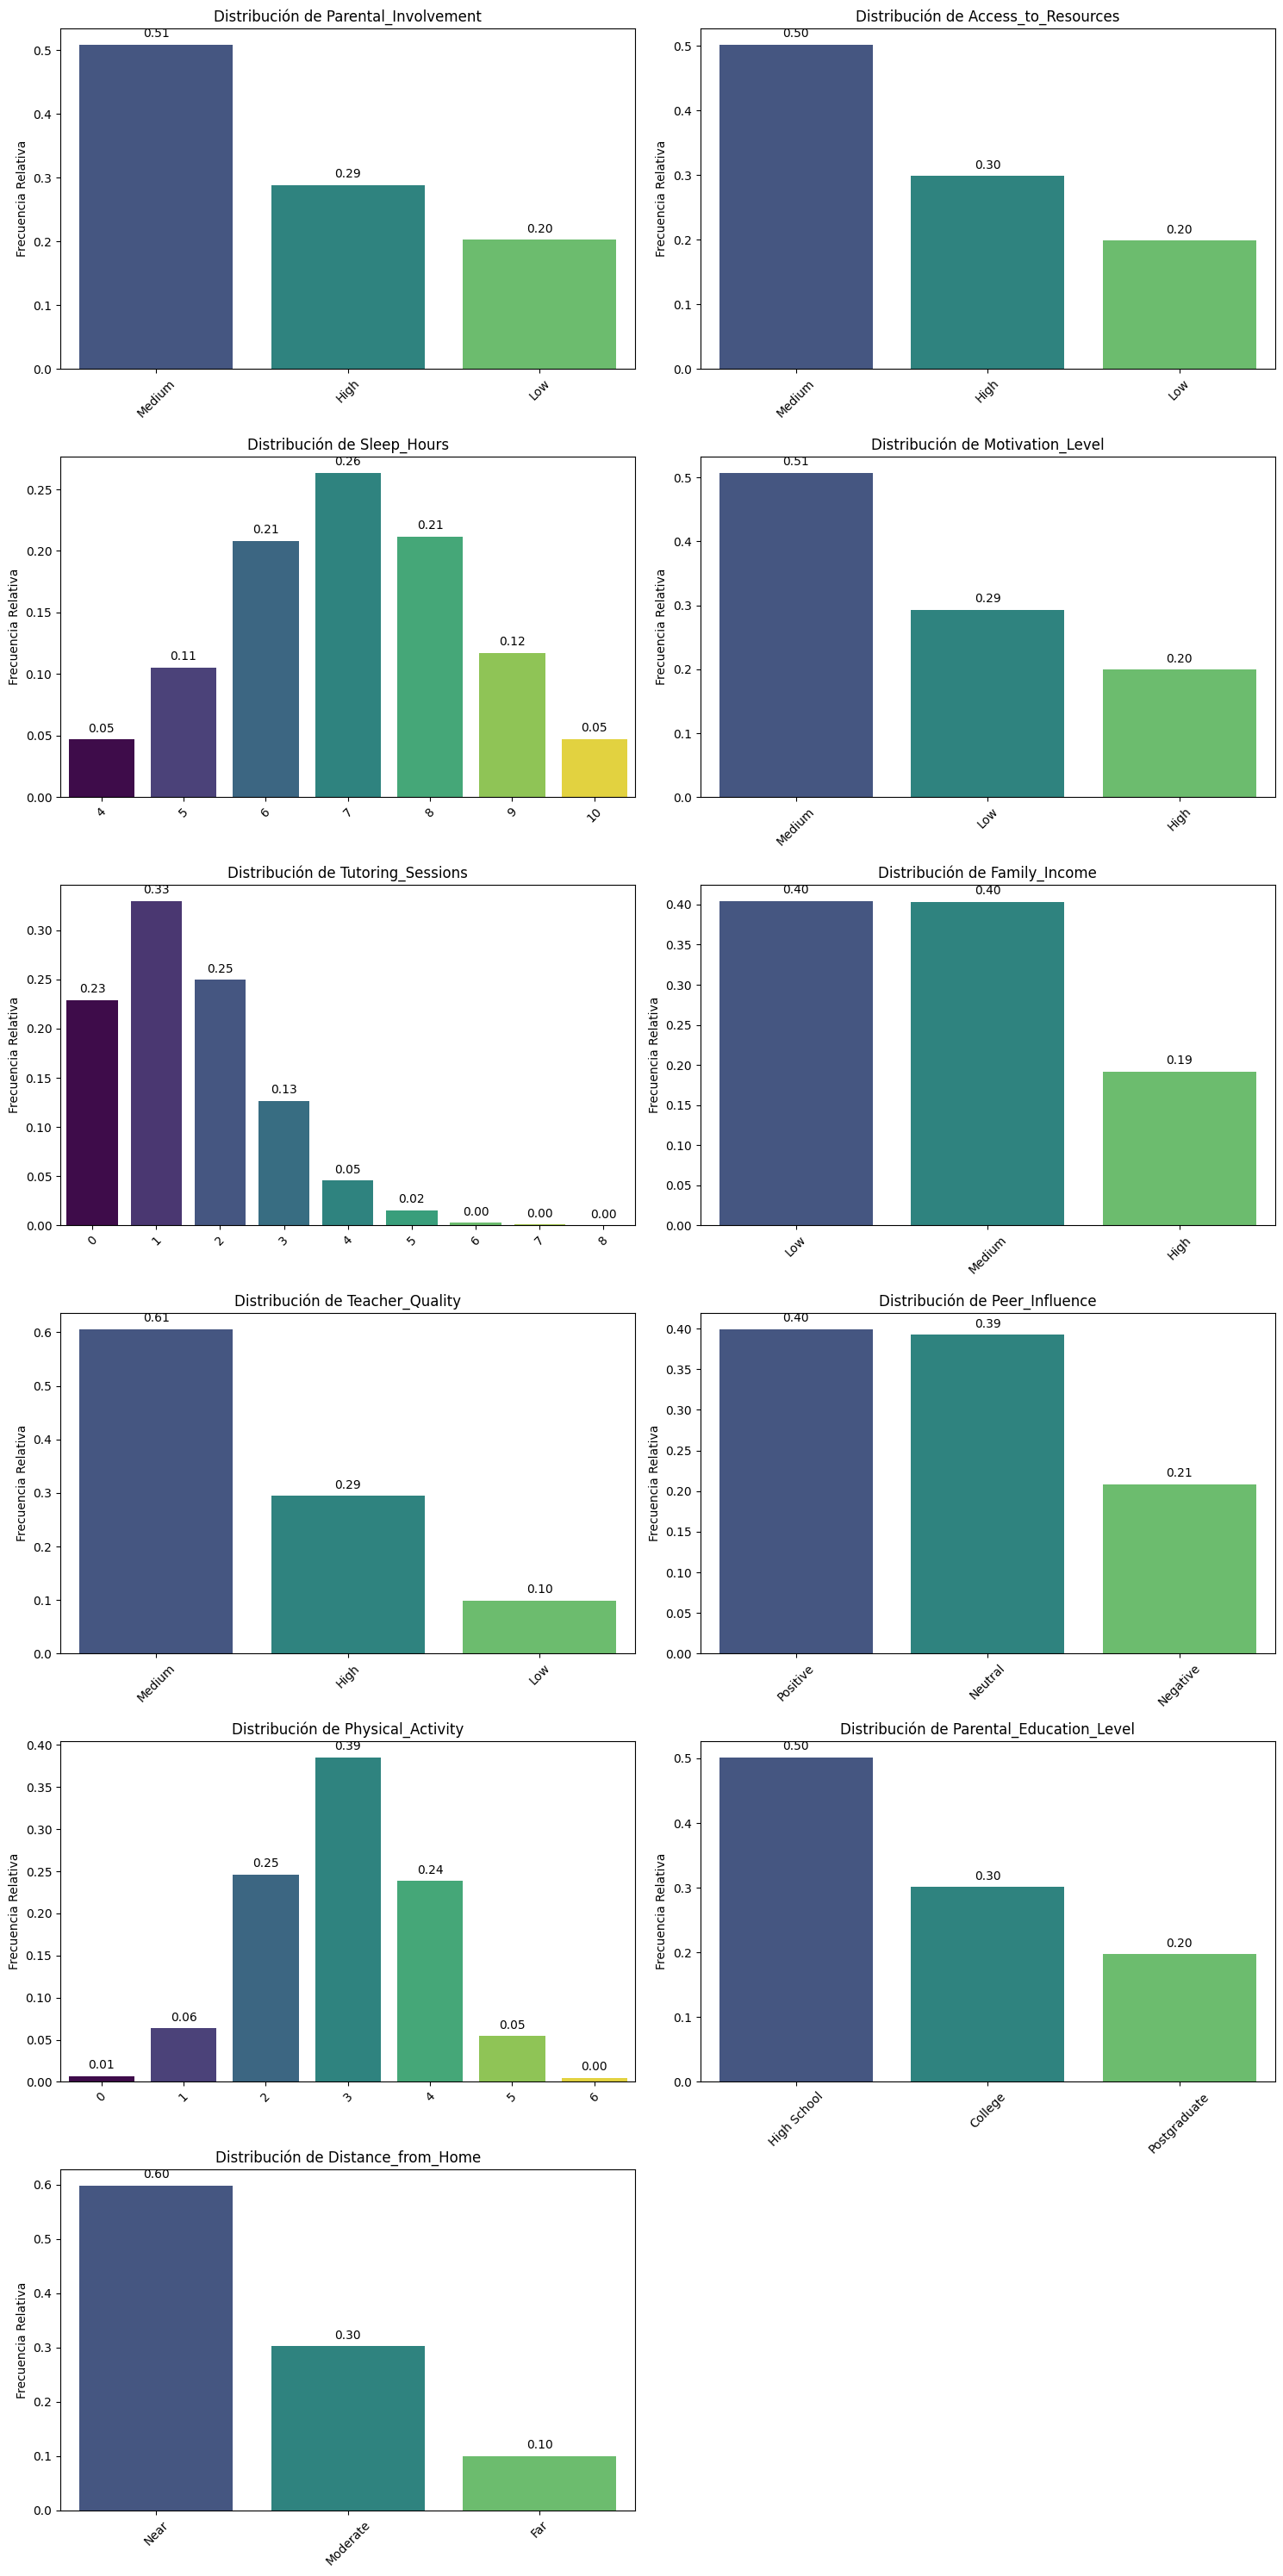

In [108]:
pinta_distribucion_categoricas(student, Categoricas)

In [89]:
# analisis univariante - numericas
student.Previous_Scores.describe()
student[["Previous_Scores", "Exam_Score", "Hours_Studied", "Attendance"]].describe()


,Previous_Scores,Exam_Score,Hours_Studied,Attendance
count,6607.000000,6607.000000,6607.000000,6607.000000
mean,75.070531,67.235659,19.975329,79.977448
std,14.399784,3.890456,5.990594,11.547475
min,50.000000,55.000000,1.000000,60.000000
25%,63.000000,65.000000,16.000000,70.000000
50%,75.000000,67.000000,20.000000,80.000000
75%,88.000000,69.000000,24.000000,90.000000
max,100.000000,101.000000,44.000000,100.000000


In [21]:
# IQR Rango Interquartilico 
Numericas= ["Exam_Score","Hours_Studied", "Attendance", "Previous_Scores"]
def get_IQR(df, lista):
    for elemento in lista:
        IQR = df[elemento].quantile(0.75) - df[elemento].quantile(0.25)
        print(f"El IQR de la columna {elemento} es de {IQR}")

get_IQR(student, Numericas)


El IQR de la columna Exam_Score es de 4.0
El IQR de la columna Hours_Studied es de 8.0
El IQR de la columna Attendance es de 20.0
El IQR de la columna Previous_Scores es de 25.0


In [28]:
# Coeficiente de variación (CV)

def get_CV(df, lista):    
    for columna in lista:
        CV = (df[columna].describe().T["std"]/df[columna].describe().T["mean"])*100
        print(f" El coeficiente de variación de {columna} es de {CV}")

get_CV(student,Numericas)

 El coeficiente de variación de Exam_Score es de 5.786298268628189
 El coeficiente de variación de Hours_Studied es de 29.989965510487238
 El coeficiente de variación de Attendance es de 14.438413861656352
 El coeficiente de variación de Previous_Scores es de 19.1816737008262


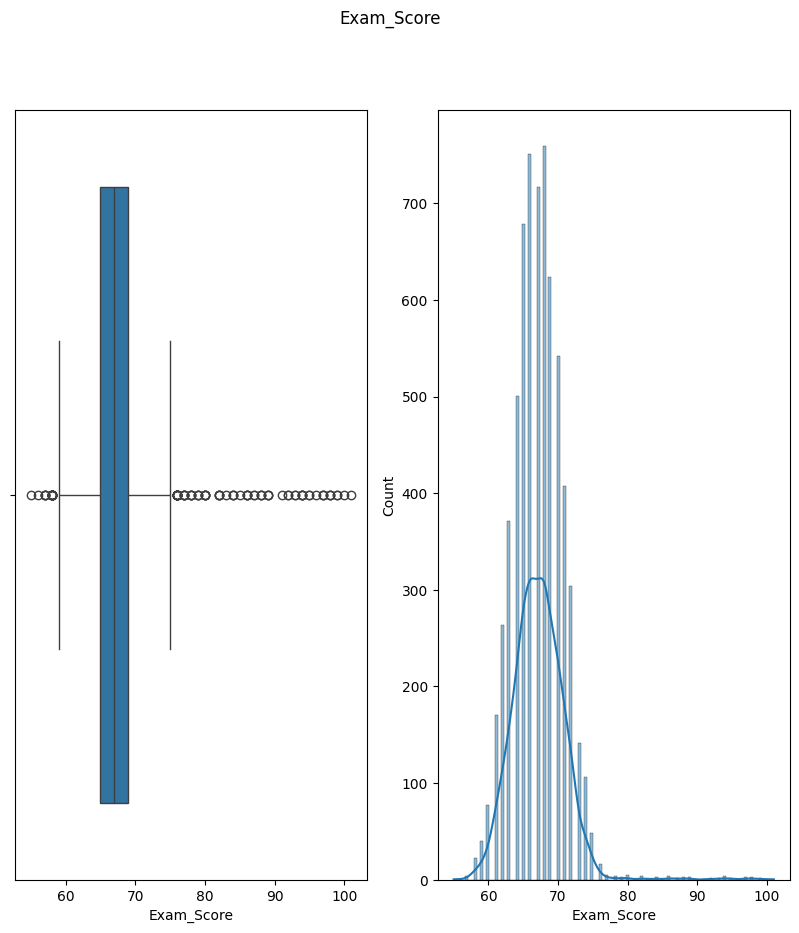

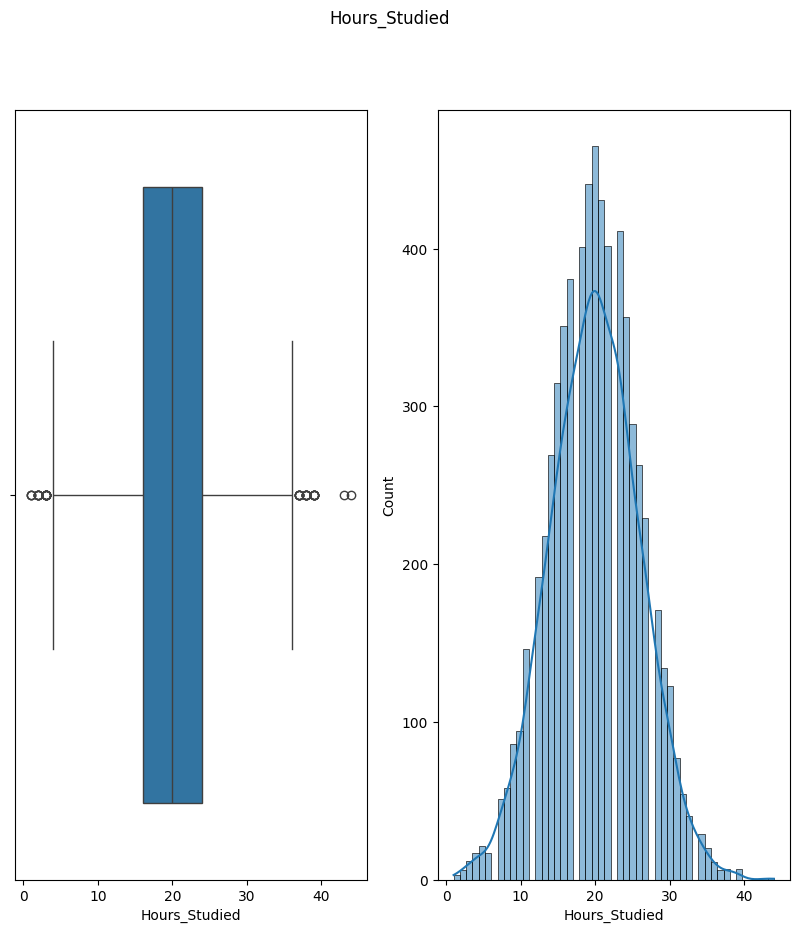

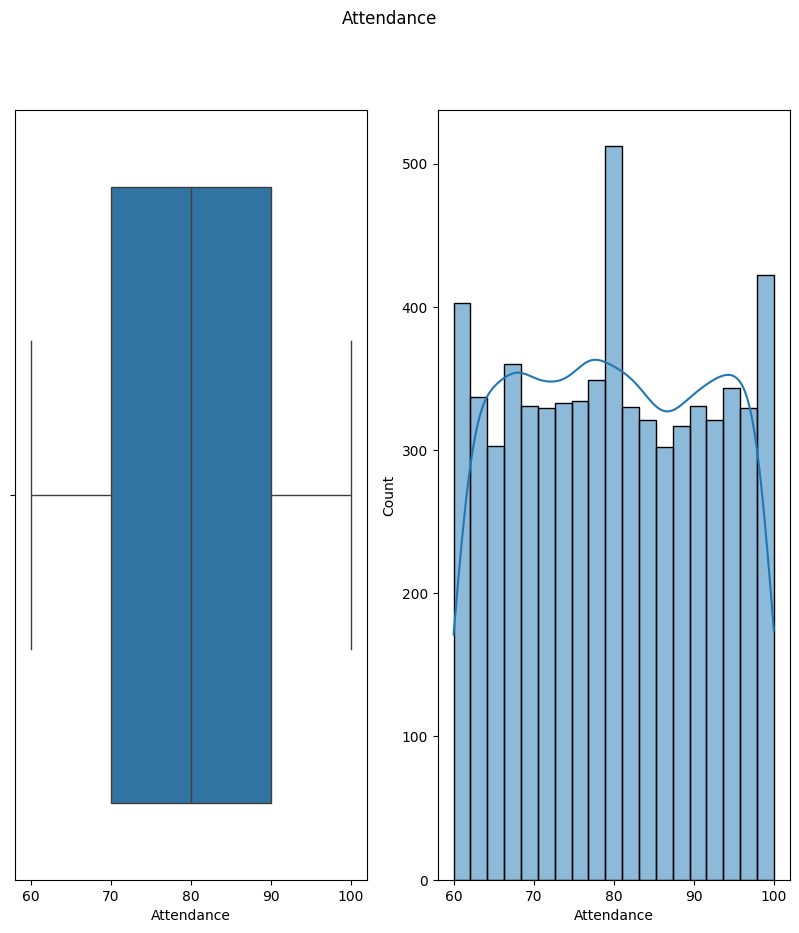

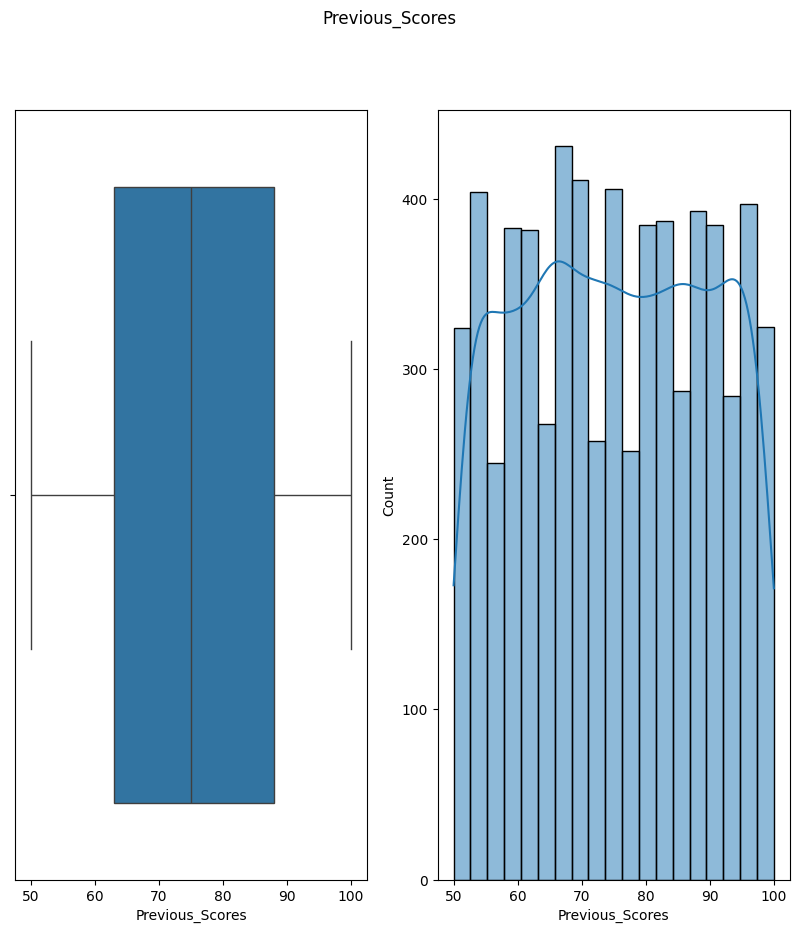

In [38]:
# Boxplot e Histo (numericas)

for columna in Numericas:
    fig, axes = plt.subplots (1,2, figsize=(10,10) )
    plt.suptitle(columna)
    sns.boxplot(x= columna, data = student, ax=axes[0])
    sns.histplot( data = student,x=columna, kde=True,  bins= "auto", ax=axes[1]);
#plt.savefig("./Imagenes/Creadas/dispercion_Exam_Score1.png")

In [72]:
#segunda variable analizada - Hours_studied
student.Hours_Studied.describe()

count    6607.000000
mean       19.975329
std         5.990594
min         1.000000
25%        16.000000
50%        20.000000
75%        24.000000
max        44.000000
Name: Hours_Studied, dtype: float64

In [74]:
def get_IQR(df, col):
    IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
    print(f" IQR {col} es de {IQR}")

get_IQR(student, "Hours_Studied")

 IQR Hours_Studied es de 8.0


In [76]:
# Coeficiente de variación (CV)

def get_CV(df, columna):    
    CV = (df[columna].describe().T["std"]/df[columna].describe().T["mean"])*100
    print(f" El coeficiente de variación de {col} es de {CV}")

get_CV(student,"Hours_Studied")

 El coeficiente de variación de Exam_Score es de 29.989965510487238


In [ ]:
# variabilidad y dispercion
def variabilidad(df):
    df_var=df.describe().loc[["std","mean"]].T
    df_var["CV"]=df_var["std"]/df_var["mean"]
    return df_var

In [55]:
variabilidad(student)

,std,mean,CV
Hours_Studied,5.990594,19.975329,0.299900
Attendance,11.547475,79.977448,0.144384
Sleep_Hours,1.468120,7.029060,0.208864
Previous_Scores,14.399784,75.070531,0.191817
Tutoring_Sessions,1.230570,1.493719,0.823830
Physical_Activity,1.031231,2.967610,0.347495
Exam_Score,3.890456,67.235659,0.057863


<Axes: >

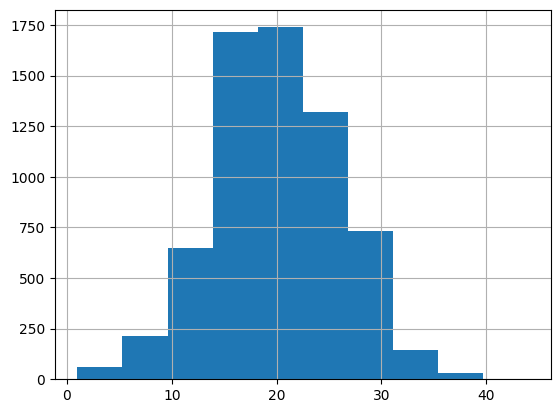

In [61]:
student.Hours_Studied.hist()


<Axes: >

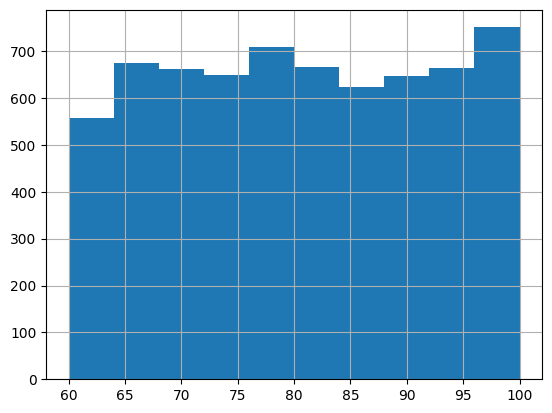

In [62]:
student.Attendance.hist()

<Axes: >

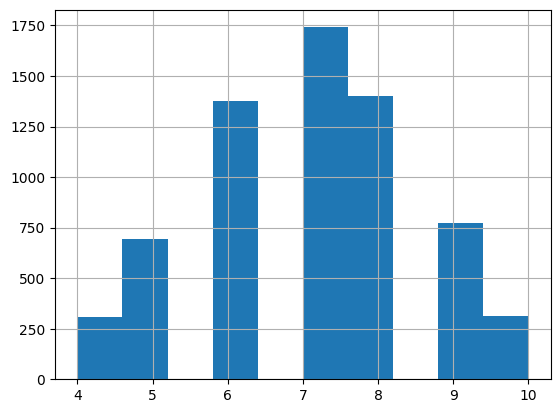

In [63]:
student.Sleep_Hours.hist()

<Axes: >

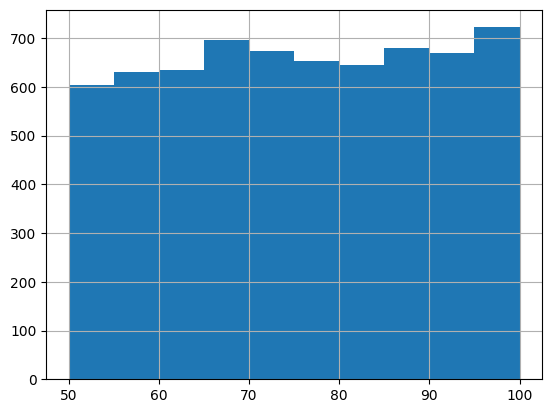

In [64]:
student.Previous_Scores.hist()

<Axes: >

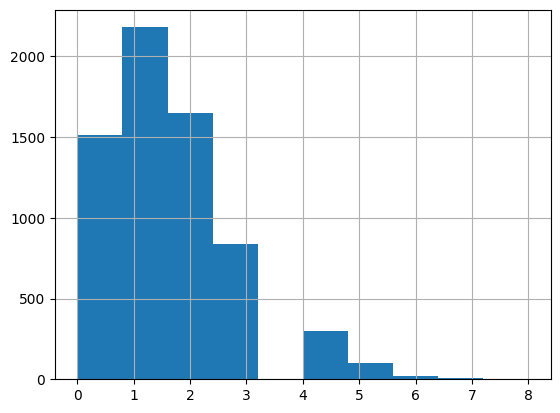

In [65]:
student.Tutoring_Sessions.hist()

<Axes: >

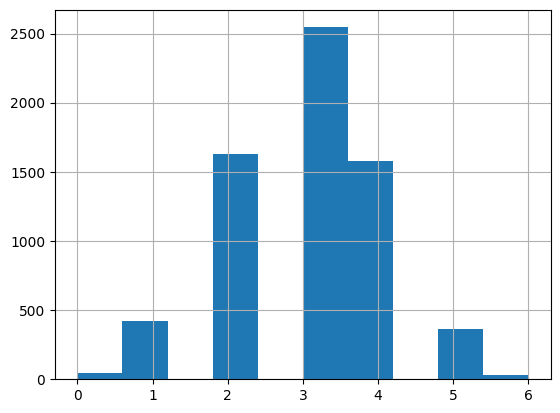

In [66]:
student.Physical_Activity.hist()

<Axes: >

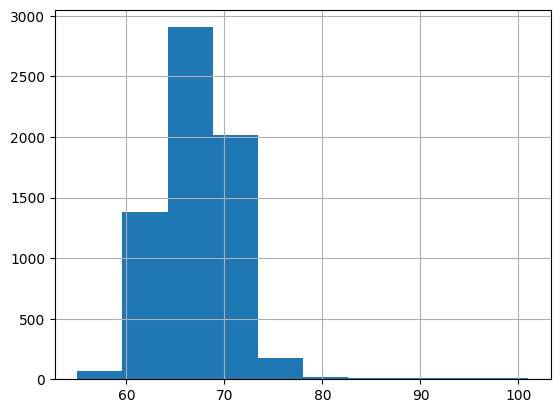

In [67]:
student.Exam_Score.hist()

In [68]:
def plot_histo_den(df, columns):
    num_cols = len(columns)
    num_rows = num_cols // 2 + num_cols % 2
    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            sns.histplot(df[column], kde=True, ax=axes[i])
            axes[i].set_title(f'Histograma y KDE de {column}')

    # Ocultar ejes vacíos
    for j in range(i + 1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()


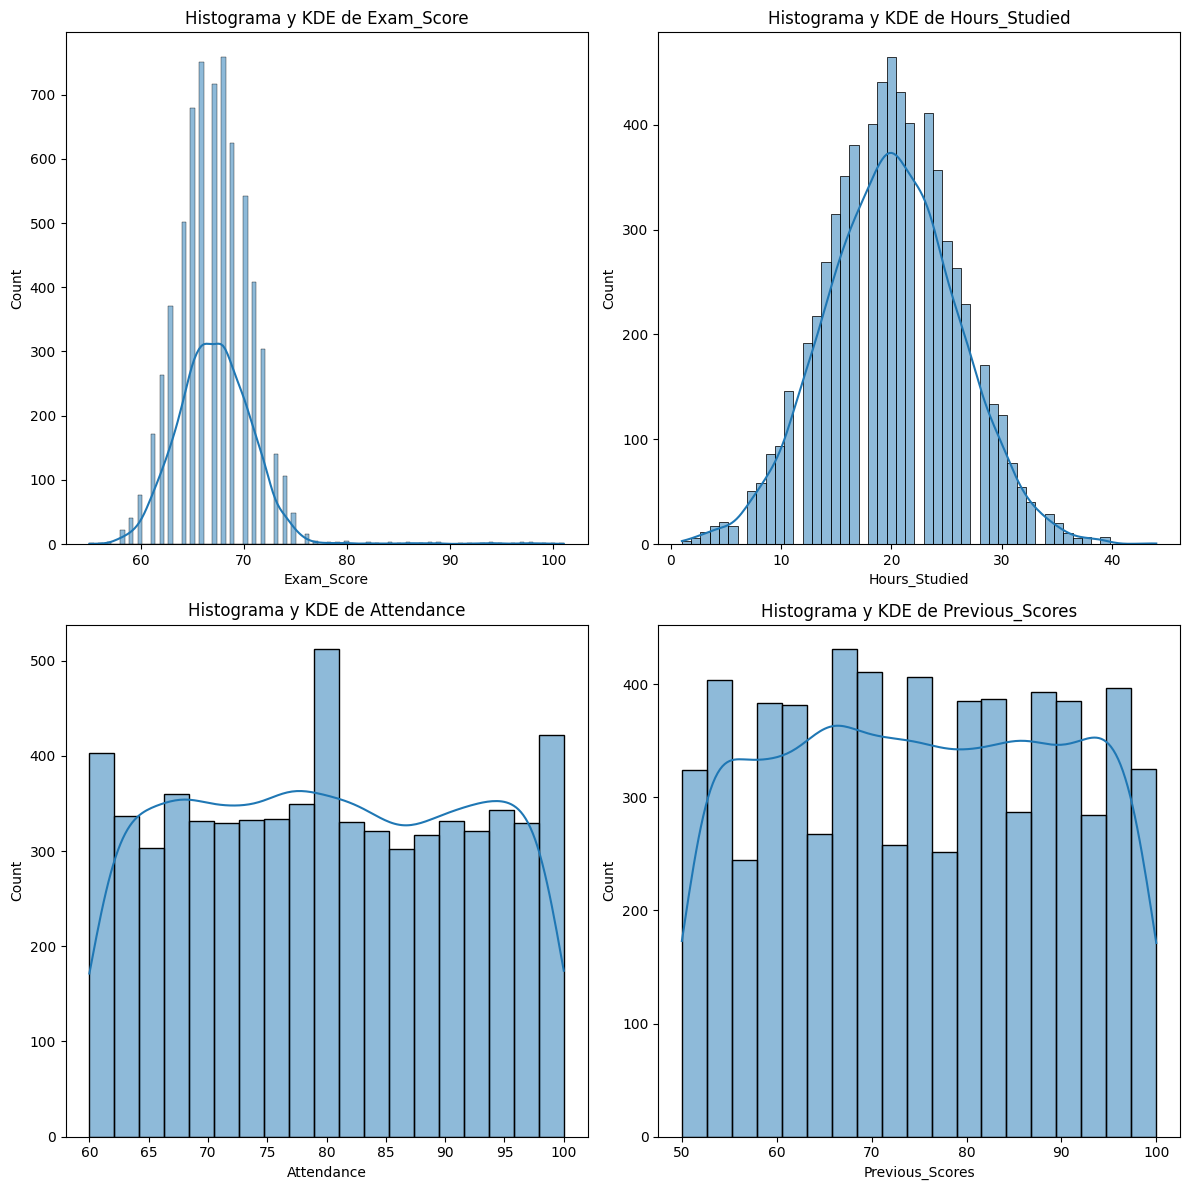

In [71]:
plot_histo_den(student,Numericas)

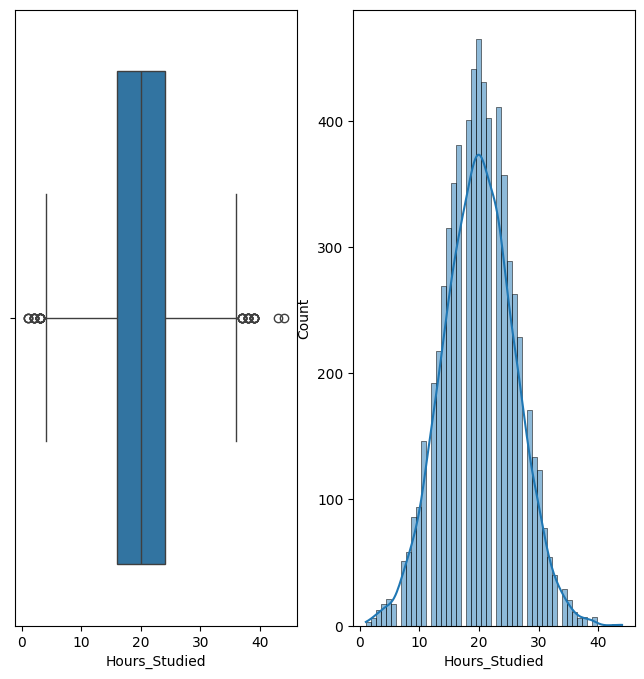

In [80]:
# Boxplot e Histo(Hours_studied)
fig, axes = plt.subplots(1,2, figsize=(8,8) )
sns.boxplot(x= "Hours_Studied", data = student, ax=axes[0])
sns.histplot( data = student,x="Hours_Studied", kde=True,  bins= "auto", ax=axes[1]);
plt.savefig("./Imagenes/Creadas/dispercion_Hours_studied2.png")

In [101]:
# analisis de binarias

Binarias= ["Gender","Learning_Disabilities","School_Type","Internet_Access", "Extracurricular_Activities"]
for columnas in Binarias: 
    print(f"Para {columnas}, la frecuencia relativa es:")
    print(student[columnas].value_counts()/len(student)*100)
    print("\n")

Para Gender, la frecuencia relativa es:
Gender
Male      57.726654
Female    42.273346
Name: count, dtype: float64


Para Learning_Disabilities, la frecuencia relativa es:
Learning_Disabilities
No     89.480854
Yes    10.519146
Name: count, dtype: float64


Para School_Type, la frecuencia relativa es:
School_Type
Public     69.592856
Private    30.407144
Name: count, dtype: float64


Para Internet_Access, la frecuencia relativa es:
Internet_Access
Yes    92.447404
No      7.552596
Name: count, dtype: float64


Para Extracurricular_Activities, la frecuencia relativa es:
Extracurricular_Activities
Yes    59.603451
No     40.396549
Name: count, dtype: float64




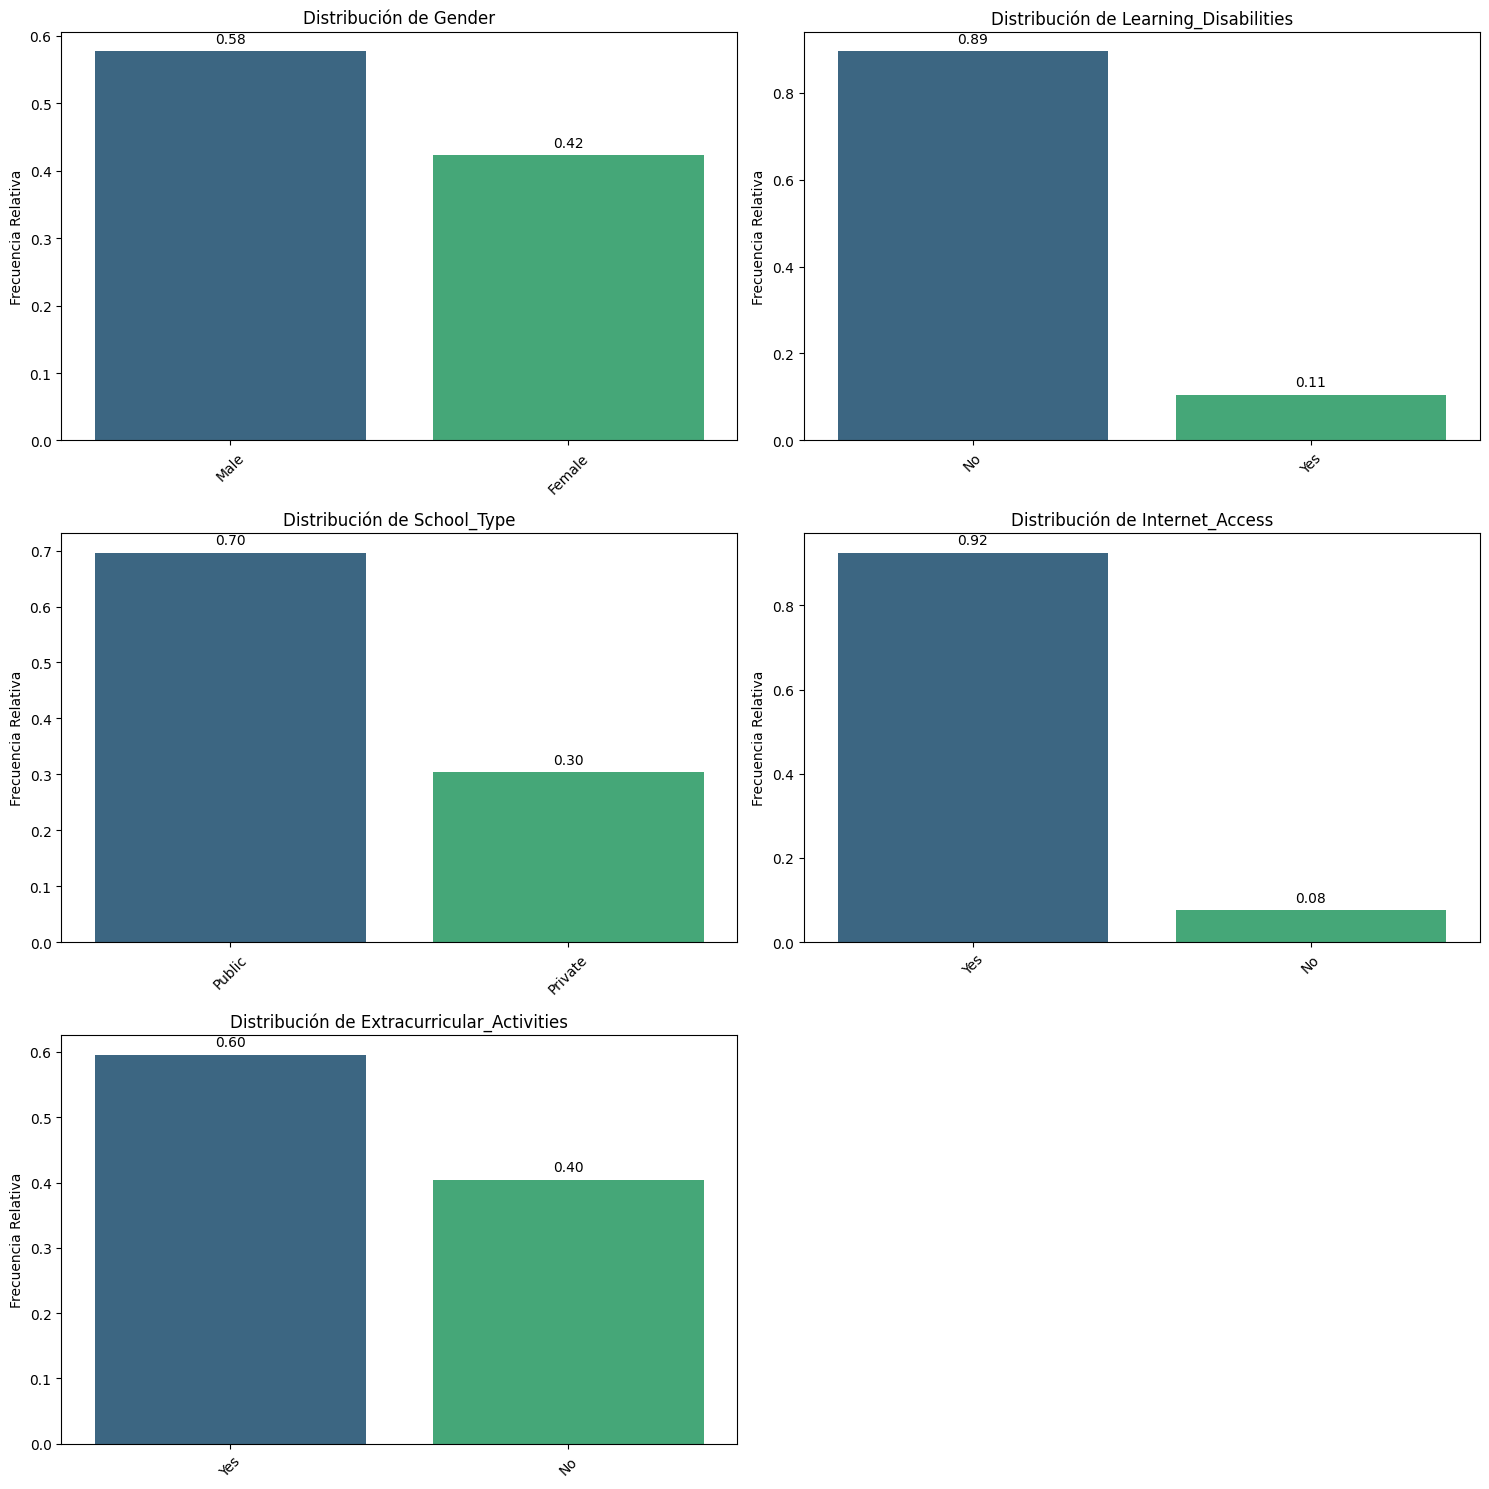

In [109]:
pinta_distribucion_categoricas(student, Binarias                   )

Text(0, 0.5, '%')

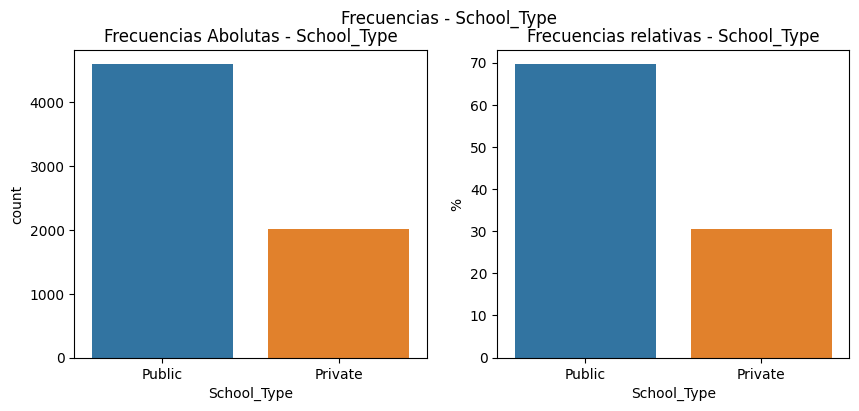

In [8]:
# frecuencia relativa y absoluta - school_type
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,4))
fig.suptitle("Frecuencias - School_Type")
sns.countplot(x="School_Type", data= student, ax=axs[0], hue= "School_Type", legend= False)
axs[0].set_title("Frecuencias Abolutas - School_Type")

valores = student.School_Type.value_counts(normalize=True)*100
sns.barplot(x=valores.index, y= valores.values, hue= valores.index, ax = axs[1]);
axs[1].set_title("Frecuencias relativas - School_Type")
axs[1].set_ylabel("%")

Text(0, 0.5, '%')

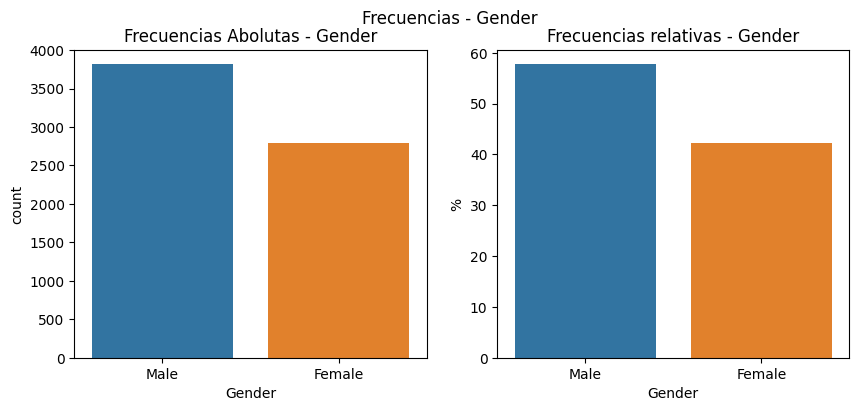

In [10]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,4))
fig.suptitle("Frecuencias - Gender")
sns.countplot(x="Gender", data= student, ax=axs[0], hue= "Gender", legend= False)
axs[0].set_title("Frecuencias Abolutas - Gender")

valores = student.Gender.value_counts(normalize=True)*100
sns.barplot(x=valores.index, y= valores.values, hue= valores.index, ax = axs[1], native_scale=True);
axs[1].set_title("Frecuencias relativas - Gender")
axs[1].set_ylabel("%")

Text(0, 0.5, '%')

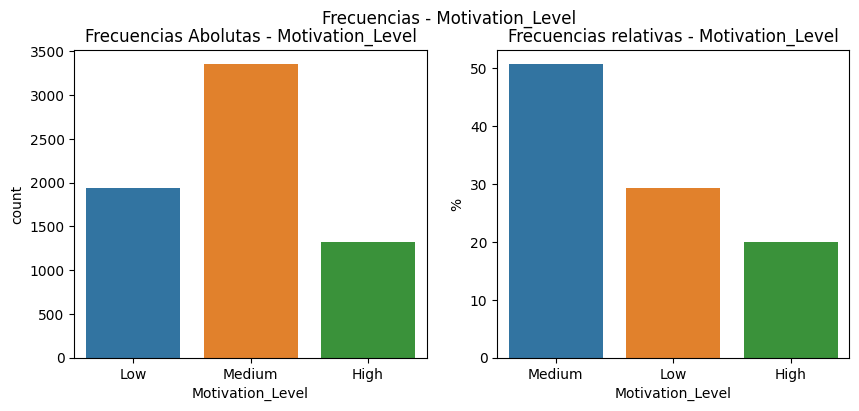

In [97]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,4))
fig.suptitle("Frecuencias - Motivation_Level")
sns.countplot(x="Motivation_Level", data= student, ax=axs[0], hue= "Motivation_Level", legend= False)
axs[0].set_title("Frecuencias Abolutas - Motivation_Level")

valores = student.Motivation_Level.value_counts(normalize=True)*100
sns.barplot(x=valores.index, y= valores.values, hue= valores.index, ax = axs[1], native_scale=True);

axs[1].set_title("Frecuencias relativas - Motivation_Level")
axs[1].set_ylabel("%")

Text(0, 0.5, '%')

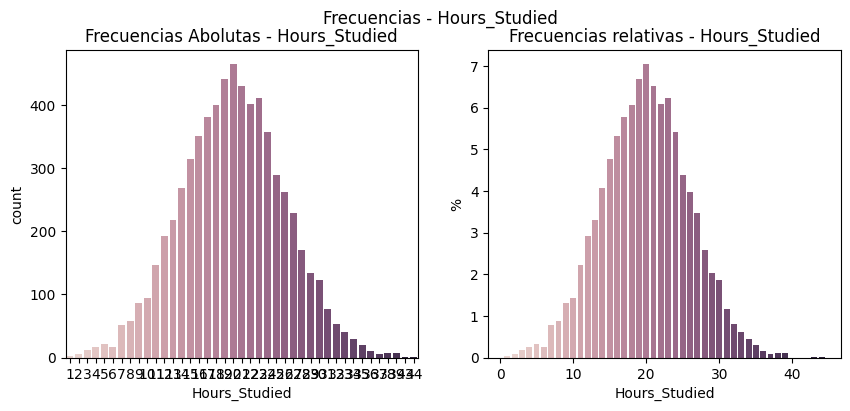

In [12]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,4))
fig.suptitle("Frecuencias - Hours_Studied")
sns.countplot(x="Hours_Studied", data= student, ax=axs[0], hue= "Hours_Studied", legend= False)
axs[0].set_title("Frecuencias Abolutas - Hours_Studied")

valores = student.Hours_Studied.value_counts(normalize=True)*100
sns.barplot(x=valores.index, y= valores.values, hue= valores.index, ax = axs[1], native_scale=True);
axs[1].set_title("Frecuencias relativas - Hours_Studied")
axs[1].set_ylabel("%")

Text(0, 0.5, '%')

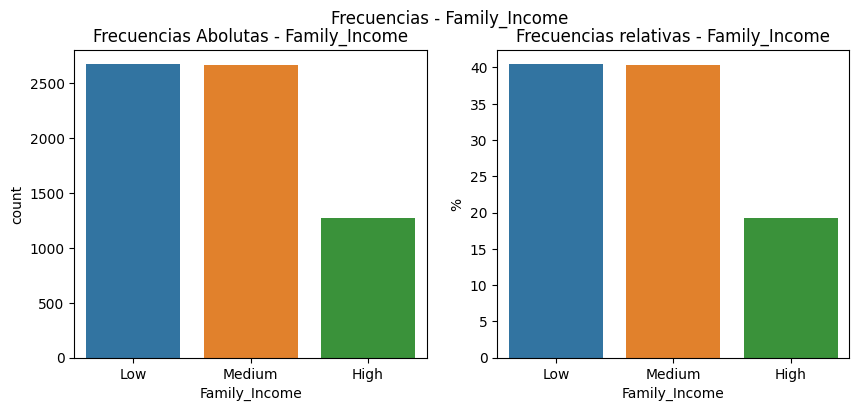

In [13]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,4))
fig.suptitle("Frecuencias - Family_Income")
sns.countplot(x="Family_Income", data= student, ax=axs[0], hue= "Family_Income", legend= False)
axs[0].set_title("Frecuencias Abolutas - Family_Income")

valores = student.Family_Income.value_counts(normalize=True)*100
sns.barplot(x=valores.index, y= valores.values, hue= valores.index, ax = axs[1], native_scale=True);
axs[1].set_title("Frecuencias relativas - Family_Income")
axs[1].set_ylabel("%")

Text(0, 0.5, '%')

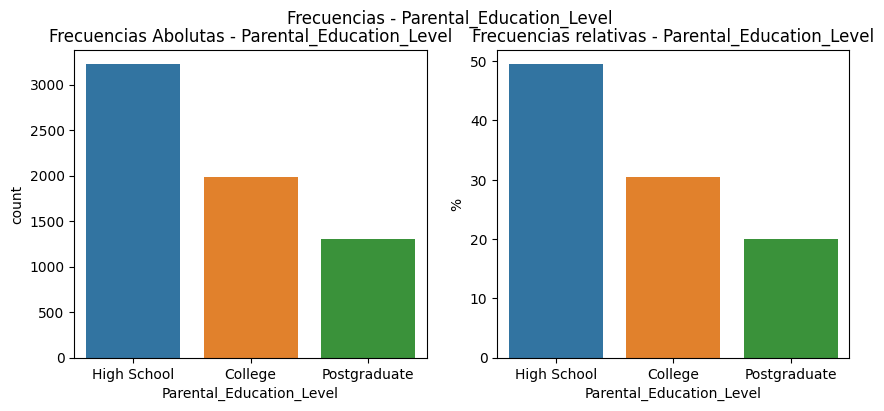

In [15]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,4))
fig.suptitle("Frecuencias - Parental_Education_Level")
sns.countplot(x="Parental_Education_Level", data= student, ax=axs[0], hue= "Parental_Education_Level", legend= False)
axs[0].set_title("Frecuencias Abolutas - Parental_Education_Level")

valores = student.Parental_Education_Level.value_counts(normalize=True)*100
sns.barplot(x=valores.index, y= valores.values, hue= valores.index, ax = axs[1], native_scale=True);
axs[1].set_title("Frecuencias relativas - Parental_Education_Level")
axs[1].set_ylabel("%")

In [ ]:
# Empezamos el bivariante. 

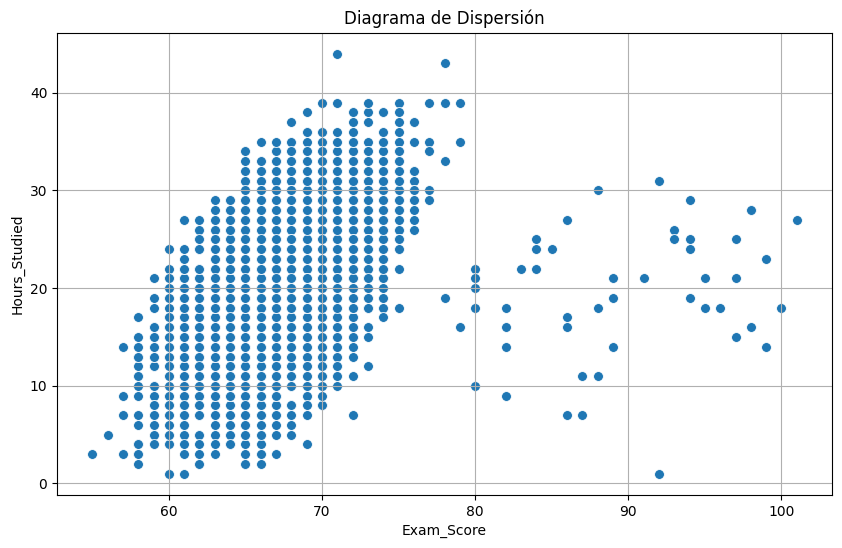

<Figure size 640x480 with 0 Axes>

In [110]:
#correlacion de numericas Exam_Score y Hours Sudied - scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=student, x="Exam_Score", y="Hours_Studied", s=50)
plt.title('Diagrama de Dispersión')
plt.xlabel("Exam_Score")
plt.ylabel("Hours_Studied")
plt.grid(True)
plt.show()
plt.savefig("./Imagenes/Creadas/scatterplotExam_Score1.png")


In [126]:
# miremos Pearson
from scipy.stats import pearsonr
pearsonr(student["Exam_Score"], student["Hours_Studied"], alternative= "less")

PearsonRResult(statistic=np.float64(0.44545495407528185), pvalue=np.float64(1.0))

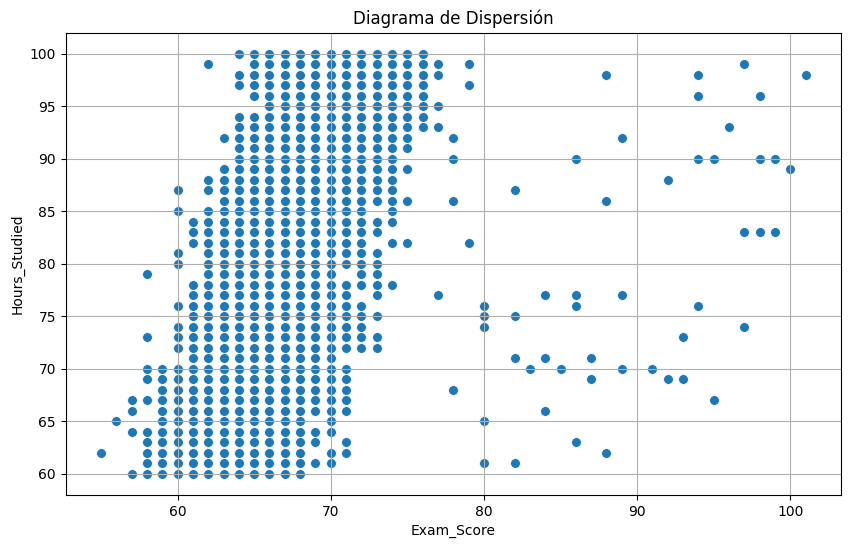

<Figure size 640x480 with 0 Axes>

In [129]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=student, x="Exam_Score", y="Attendance", s=50)
plt.title('Diagrama de Dispersión')
plt.xlabel("Exam_Score")
plt.ylabel("Hours_Studied")
plt.grid(True)
plt.show()
plt.savefig("./Imagenes/Creadas/scatterplotExam_Score1.png")

In [131]:
# miremos Pearson
from scipy.stats import pearsonr
pearsonr(student["Exam_Score"], student["Attendance"], alternative= "less")

PearsonRResult(statistic=np.float64(0.5810718633120641), pvalue=np.float64(1.0))

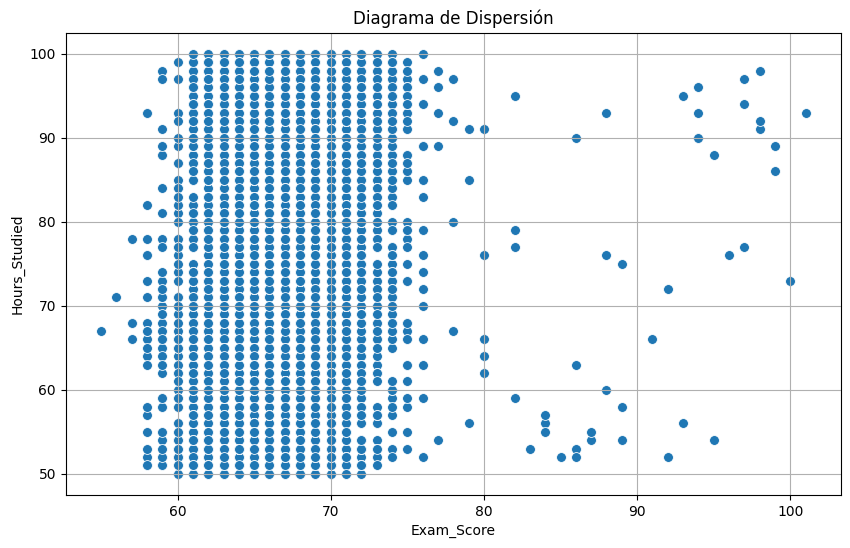

<Figure size 640x480 with 0 Axes>

In [132]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=student, x="Exam_Score", y="Previous_Scores", s=50)
plt.title('Diagrama de Dispersión')
plt.xlabel("Exam_Score")
plt.ylabel("Hours_Studied")
plt.grid(True)
plt.show()
plt.savefig("./Imagenes/Creadas/scatterplotExam_Score1.png")

In [133]:
# miremos Pearson
from scipy.stats import pearsonr
pearsonr(student["Exam_Score"], student["Previous_Scores"], alternative= "less")

PearsonRResult(statistic=np.float64(0.17507908702291097), pvalue=np.float64(1.0))

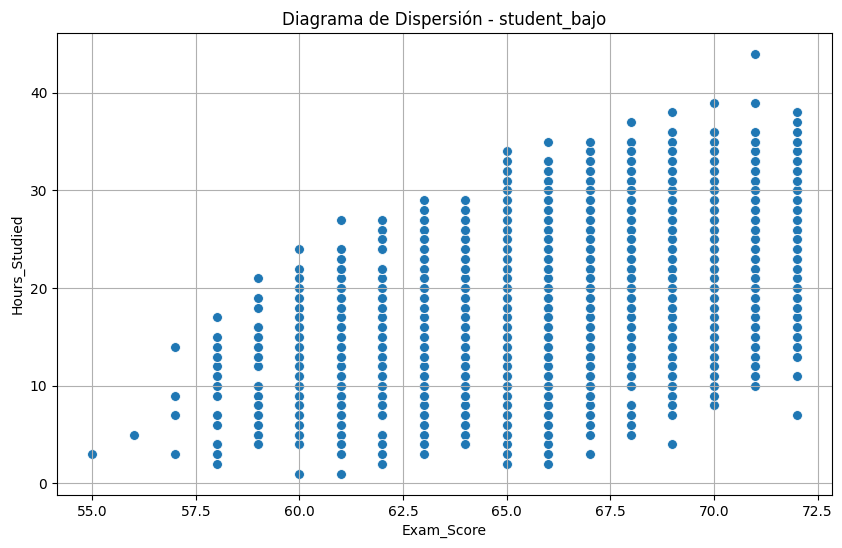

<Figure size 640x480 with 0 Axes>

In [140]:
# hacemos un df con Exam_Score < 73 para ver la correlacion que tiene 
student_bajo = student.loc[student["Exam_Score"] < 73]
student_separado.head(5)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=student_bajo, x="Exam_Score", y="Hours_Studied", s=50)
plt.title('Diagrama de Dispersión - student_bajo')
plt.xlabel("Exam_Score")
plt.ylabel("Hours_Studied")
plt.grid(True)
plt.show()
plt.savefig("./Imagenes/Creadas/scatterplotExam_Score_sep.png")

In [141]:
from scipy.stats import pearsonr
pearsonr(student_bajo["Exam_Score"], student_bajo["Hours_Studied"], alternative= "less")

PearsonRResult(statistic=np.float64(0.46290362857814515), pvalue=np.float64(1.0))

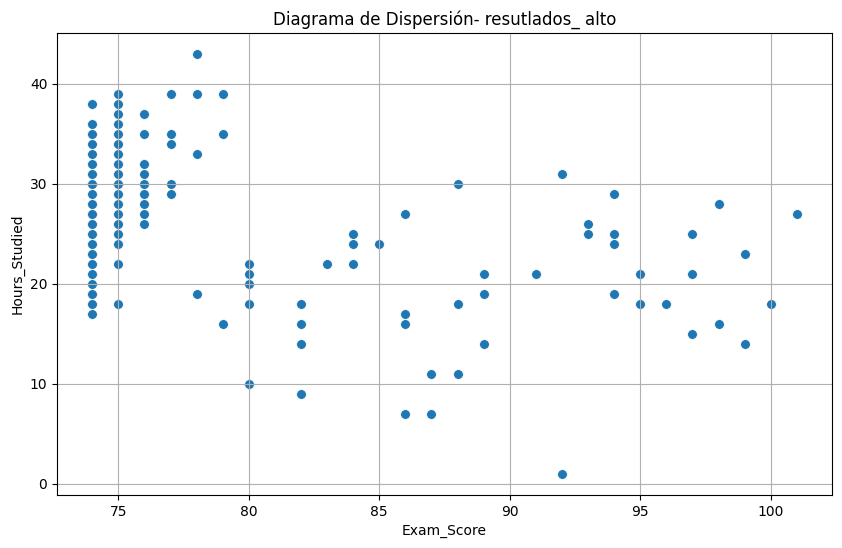

<Figure size 640x480 with 0 Axes>

In [147]:
# y ahora con Exam Score > 73
student_alto = student.loc[student["Exam_Score"] > 73]
student_alto.head(5)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=student_alto, x="Exam_Score", y="Hours_Studied", s=50)
plt.title('Diagrama de Dispersión- resutlados_ alto')
plt.xlabel("Exam_Score")
plt.ylabel("Hours_Studied")
plt.grid(True)
plt.show()
plt.savefig("./Imagenes/Creadas/scatterplotExam_Score_sep.png")

In [146]:
from scipy.stats import pearsonr
pearsonr(student_alto["Exam_Score"], student_alto["Hours_Studied"], alternative= "less")

PearsonRResult(statistic=np.float64(-0.43257026814133276), pvalue=np.float64(4.7614943309776044e-05))

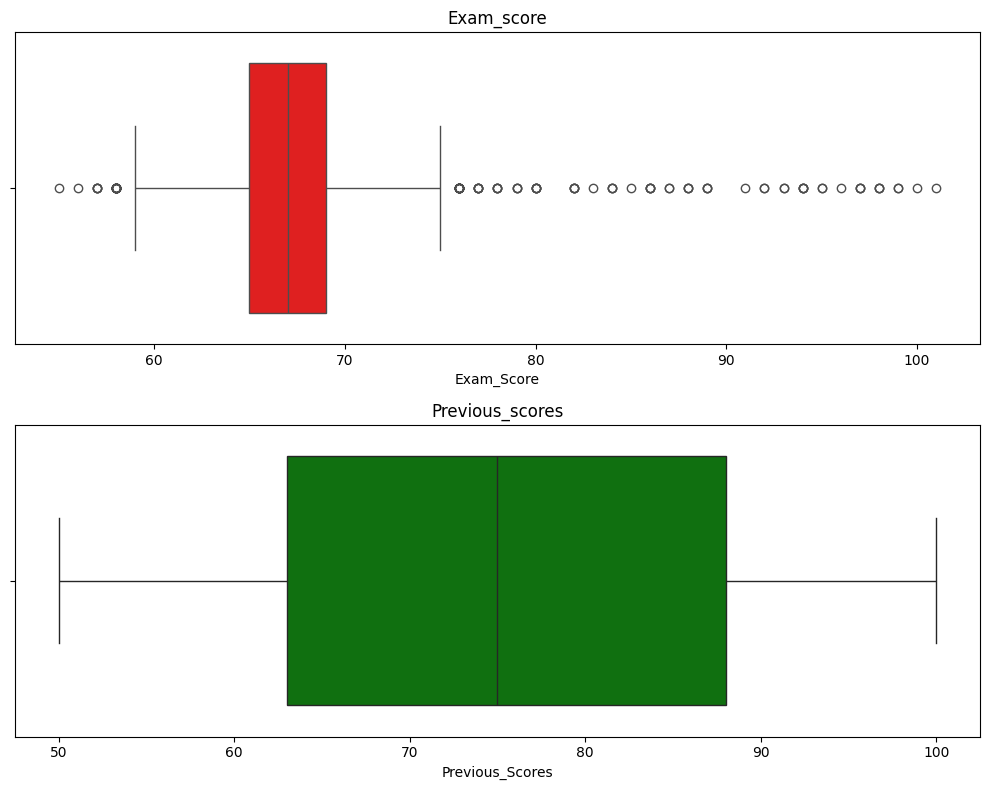

In [173]:
fig, axs= plt.subplots(2,1, figsize=(10,8))
sns.boxplot(x= student["Exam_Score"], ax = axs[0], color= "red")
axs[0].set_title("Exam_score")
sns.boxplot(x=student["Previous_Scores"], ax= axs[1], color="green")
axs[1].set_title("Previous_scores")
plt.tight_layout()
plt.savefig("./Imagenes/Creadas/sorprendente_scorepboxplot3.png")

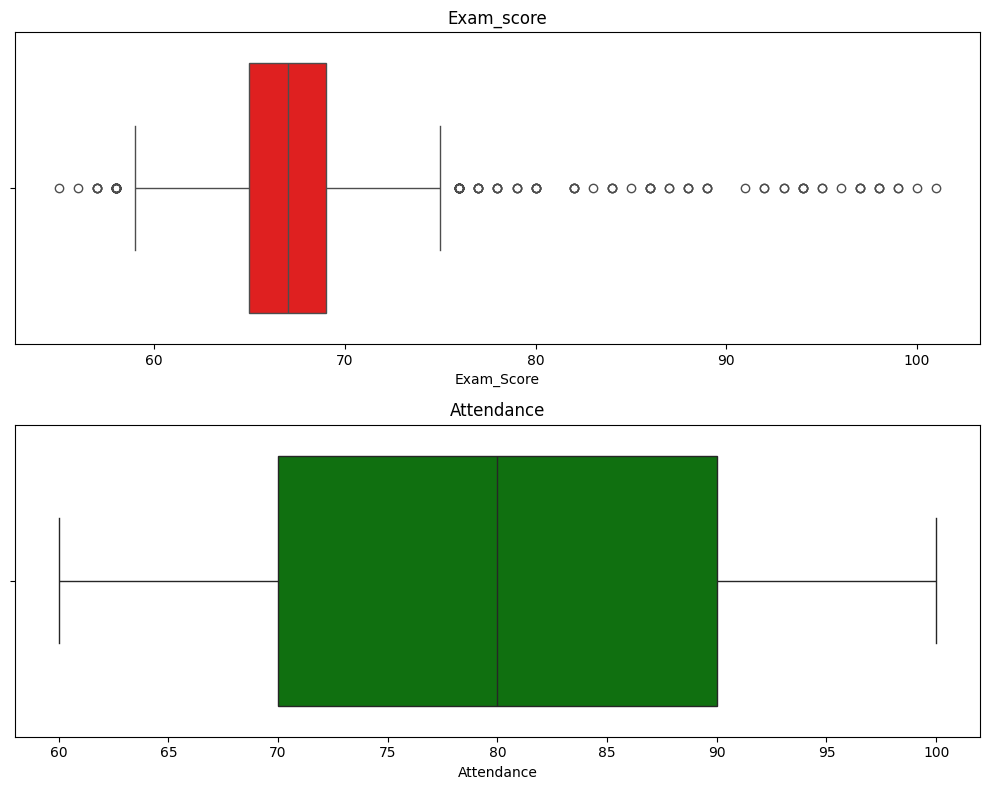

In [174]:
fig, axs= plt.subplots(2,1, figsize=(10,8))
sns.boxplot(x= student["Exam_Score"], ax = axs[0], color= "red")
axs[0].set_title("Exam_score")
sns.boxplot(x=student["Attendance"], ax= axs[1], color="green")
axs[1].set_title("Attendance")
plt.tight_layout()

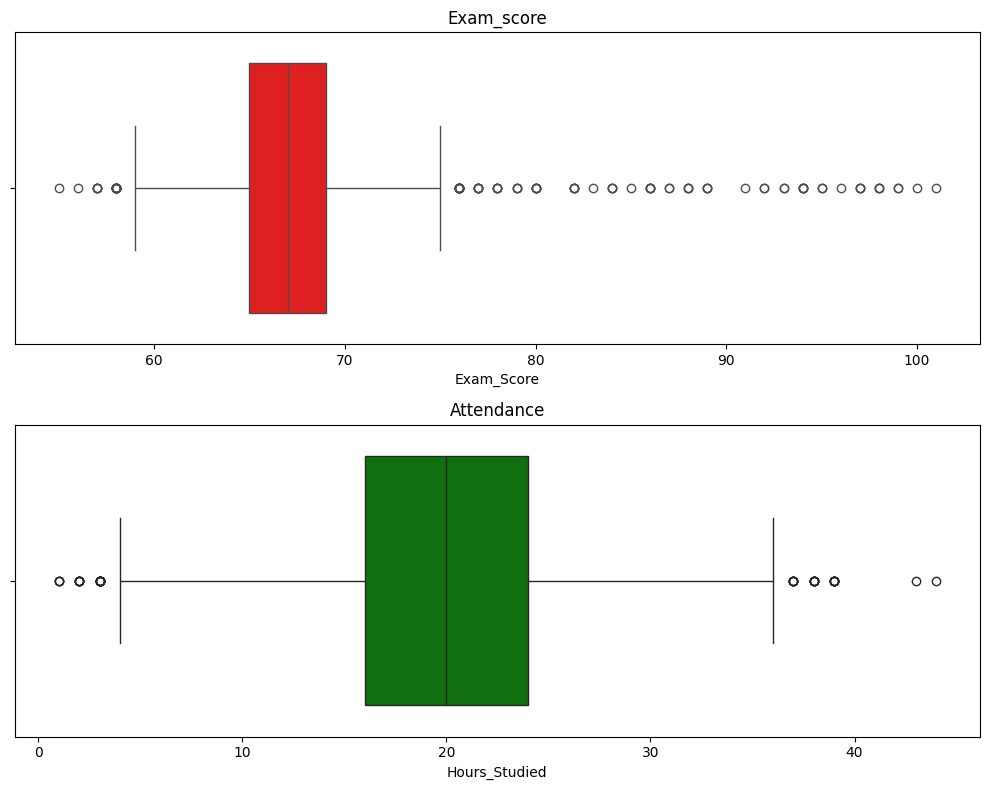

In [175]:
fig, axs= plt.subplots(2,1, figsize=(10,8))
sns.boxplot(x= student["Exam_Score"], ax = axs[0], color= "red")
axs[0].set_title("Exam_score")
sns.boxplot(x=student["Hours_Studied"], ax= axs[1], color="green")
axs[1].set_title("Attendance")
plt.tight_layout()

In [118]:
# bivariante numerica con categorica (binaria)

def plot_grouped_histograms(df, cat_col, num_col, group_size):
    unique_cats = df[cat_col].unique()
    num_cats = len(unique_cats)

    for i in range(0, num_cats, group_size):
        subset_cats = unique_cats[i:i+group_size]
        subset_df = df[df[cat_col].isin(subset_cats)]
        
        plt.figure(figsize=(10, 6))
        for cat in subset_cats:
            sns.histplot(subset_df[subset_df[cat_col] == cat][num_col], kde=True, label=str(cat))
        
        plt.title(f'Histograms of {num_col} for {cat_col} (Group {i//group_size + 1})')
        plt.xlabel(num_col)
        plt.ylabel('Frequency')
        plt.legend()
        plt.show()

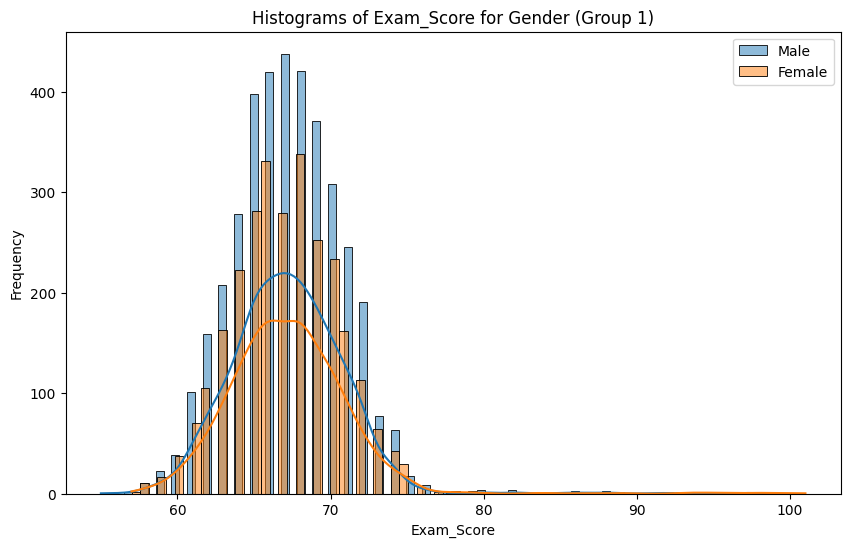

In [119]:
plot_grouped_histograms(student,cat_col="Gender", num_col="Exam_Score", group_size=2)

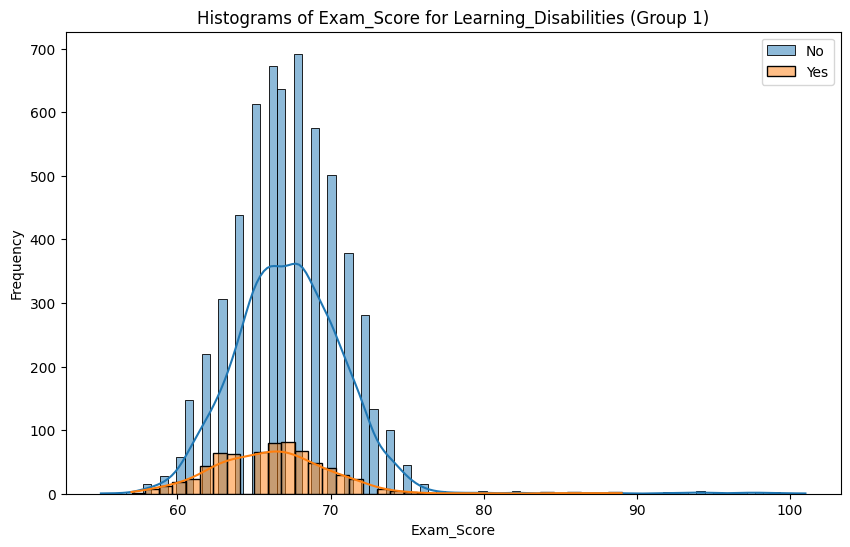

In [150]:
plot_grouped_histograms(student,cat_col="Learning_Disabilities", num_col="Exam_Score", group_size=2)

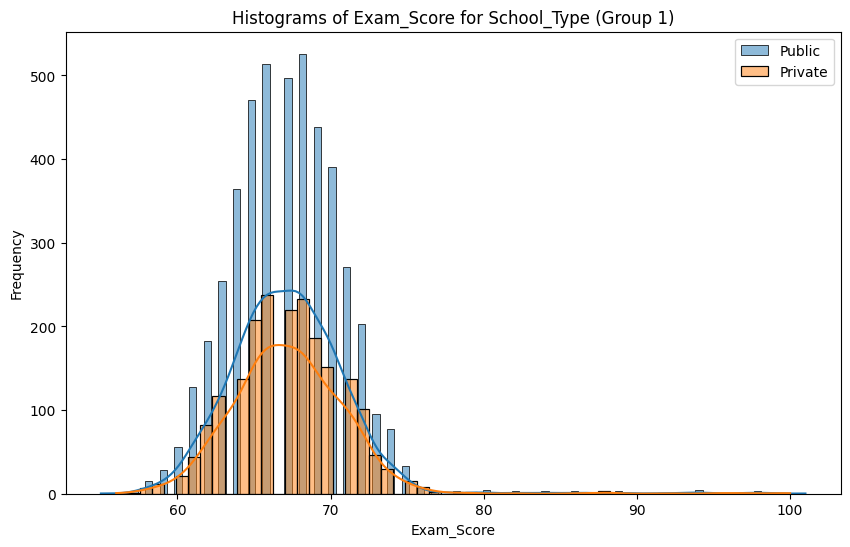

In [149]:
plot_grouped_histograms(student,cat_col="School_Type", num_col="Exam_Score", group_size=2)

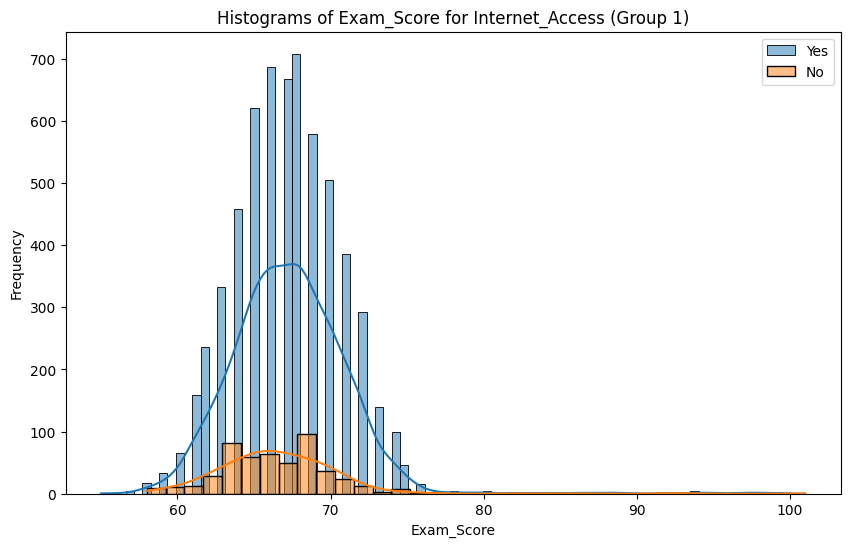

In [151]:
plot_grouped_histograms(student,cat_col="Internet_Access", num_col="Exam_Score", group_size=2)

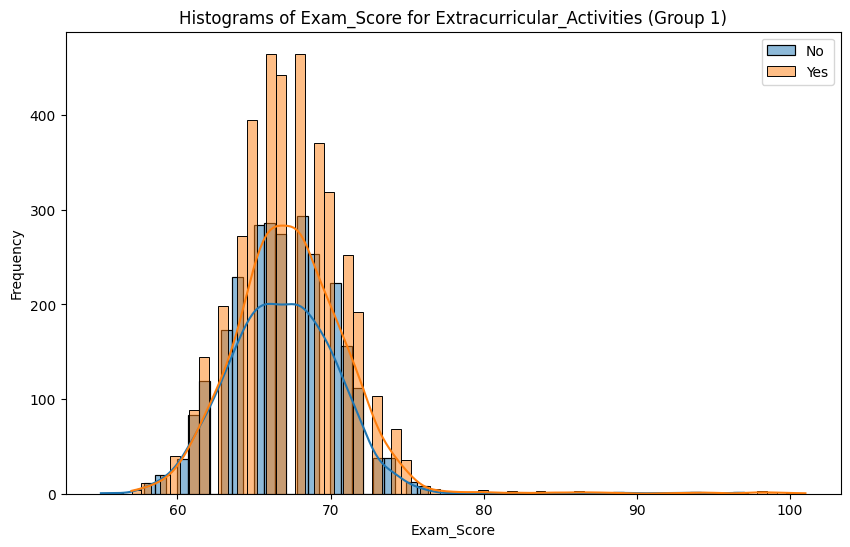

In [152]:
plot_grouped_histograms(student,cat_col="Extracurricular_Activities", num_col="Exam_Score", group_size=2)

In [153]:
# creacion de nueva columna "aprobacion", en la cual se considera "SI", si el Exam_score > 73
student["aprobacion"] = "resto"
student.loc[student["Exam_Score"] > 73, "aprobacion"] = "aprobado - notablemente"
student["aprobacion"].value_counts()

aprobacion
resto                      6377
aprobado - notablemente     230
Name: count, dtype: int64

In [154]:
def plot_categorical_relationship_fin(df, cat_col1, cat_col2, relative_freq=False, show_values=False, size_group = 5):
    # Prepara los datos
    count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')
    total_counts = df[cat_col1].value_counts()
    
    # Convierte a frecuencias relativas si se solicita
    if relative_freq:
        count_data['count'] = count_data.apply(lambda x: x['count'] / total_counts[x[cat_col1]], axis=1)

    # Si hay más de size_group categorías en cat_col1, las divide en grupos de size_group
    unique_categories = df[cat_col1].unique()
    if len(unique_categories) > size_group:
        num_plots = int(np.ceil(len(unique_categories) / size_group))

        for i in range(num_plots):
            # Selecciona un subconjunto de categorías para cada gráfico
            categories_subset = unique_categories[i * size_group:(i + 1) * size_group]
            data_subset = count_data[count_data[cat_col1].isin(categories_subset)]

            # Crea el gráfico
            plt.figure(figsize=(10, 6))
            ax = sns.barplot(x=cat_col1, y='count', hue=cat_col2, data=data_subset, order=categories_subset)

            # Añade títulos y etiquetas
            plt.title(f'Relación entre {cat_col1} y {cat_col2} - Grupo {i + 1}')
            plt.xlabel(cat_col1)
            plt.ylabel('Frecuencia' if relative_freq else 'Conteo')
            plt.xticks(rotation=45)

            # Mostrar valores en el gráfico
            if show_values:
                for p in ax.patches:
                    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                                ha='center', va='center', fontsize=10, color='black', xytext=(0, size_group),
                                textcoords='offset points')

            # Muestra el gráfico
            plt.show()
    else:
        # Crea el gráfico para menos de size_group categorías
        plt.figure(figsize=(10, 6))
        ax = sns.barplot(x=cat_col1, y='count', hue=cat_col2, data=count_data)

        # Añade títulos y etiquetas
        plt.title(f'Relación entre {cat_col1} y {cat_col2}')
        plt.xlabel(cat_col1)
        plt.ylabel('Frecuencia' if relative_freq else 'Conteo')
        plt.xticks(rotation=45)

        # Mostrar valores en el gráfico
        if show_values:
            for p in ax.patches:
                ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha='center', va='center', fontsize=10, color='black', xytext=(0, size_group),
                            textcoords='offset points')

        # Muestra el gráfico
        plt.show()


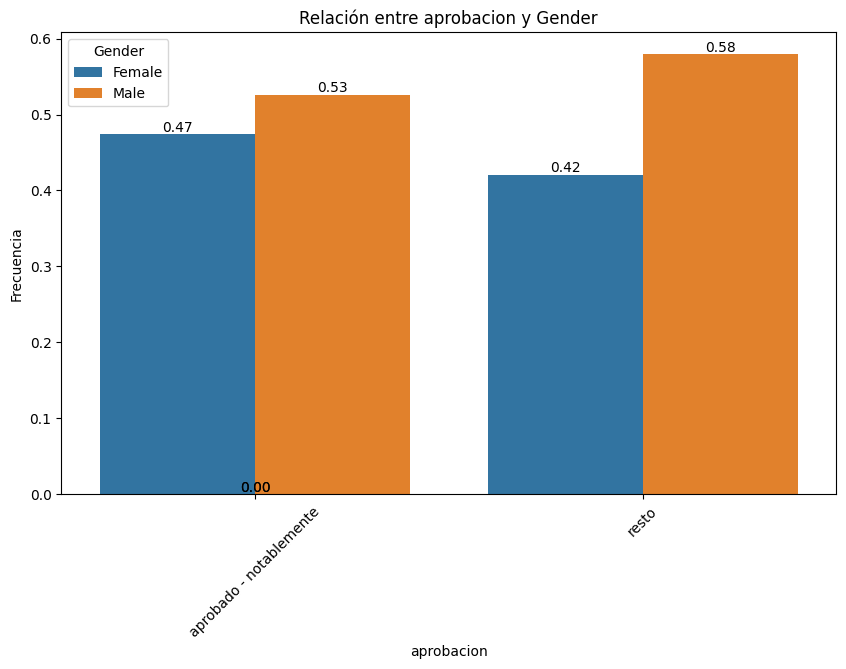

In [225]:
plot_categorical_relationship_fin(student, "aprobacion","Gender", show_values= True, relative_freq= True)

In [178]:
from scipy.stats import mannwhitneyu 
grupo_a = student.loc[student.Gender == "Male"]["Exam_Score"]
grupo_b = student.loc[student.Gender == "Female"]["Exam_Score"]

u_stat, p_valor = mannwhitneyu(grupo_a, grupo_b)

print("Estadístico U:", u_stat)
print("Valor p:", p_valor)

Estadístico U: 5372067.5
Valor p: 0.5481442905111631


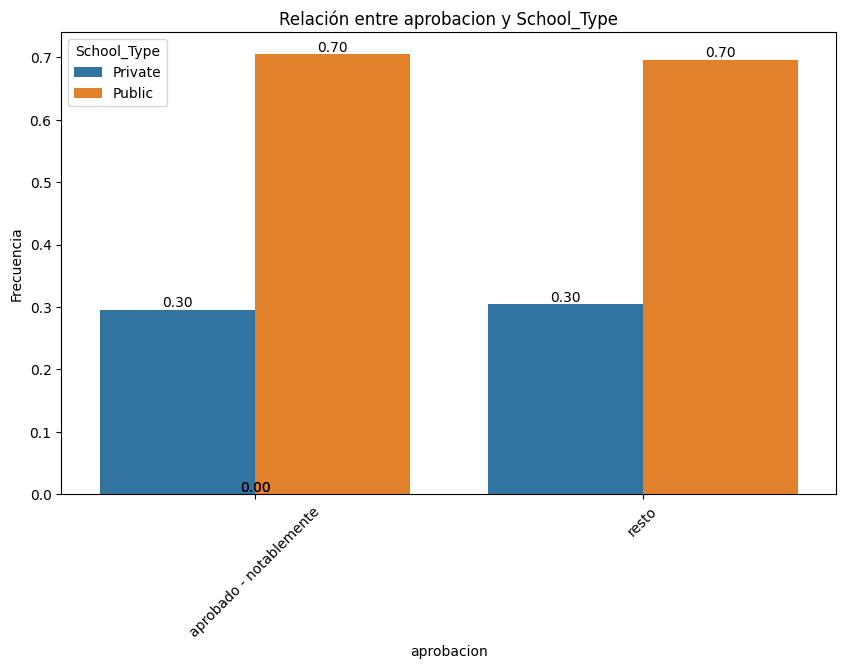

In [156]:
plot_categorical_relationship_fin(student, "aprobacion","School_Type", show_values= True, relative_freq= True)

Text(0, 0.5, '%')

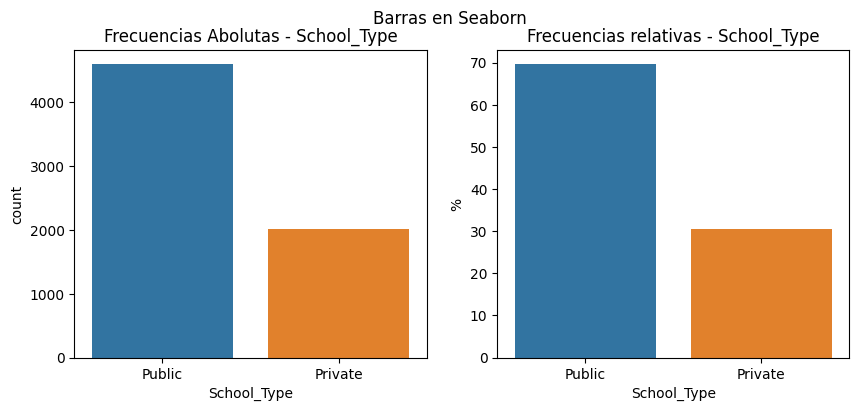

In [176]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,4))
fig.suptitle("Barras en Seaborn")
sns.countplot(x="School_Type", data= student, ax=axs[0], hue= "School_Type", legend= False)
axs[0].set_title("Frecuencias Abolutas - School_Type")

valores = student.School_Type.value_counts(normalize=True)*100
sns.barplot(x=valores.index, y= valores.values, hue= valores.index, ax = axs[1]);
axs[1].set_title("Frecuencias relativas - School_Type")
axs[1].set_ylabel("%")

In [177]:
from scipy.stats import mannwhitneyu 
grupo_a = student.loc[student.School_Type == "Public"]["Exam_Score"]
grupo_b = student.loc[student.School_Type == "Private"]["Exam_Score"]

u_stat, p_valor = mannwhitneyu(grupo_a, grupo_b)

print("Estadístico U:", u_stat)
print("Valor p:", p_valor)

Estadístico U: 4552099.5
Valor p: 0.3485872249726576


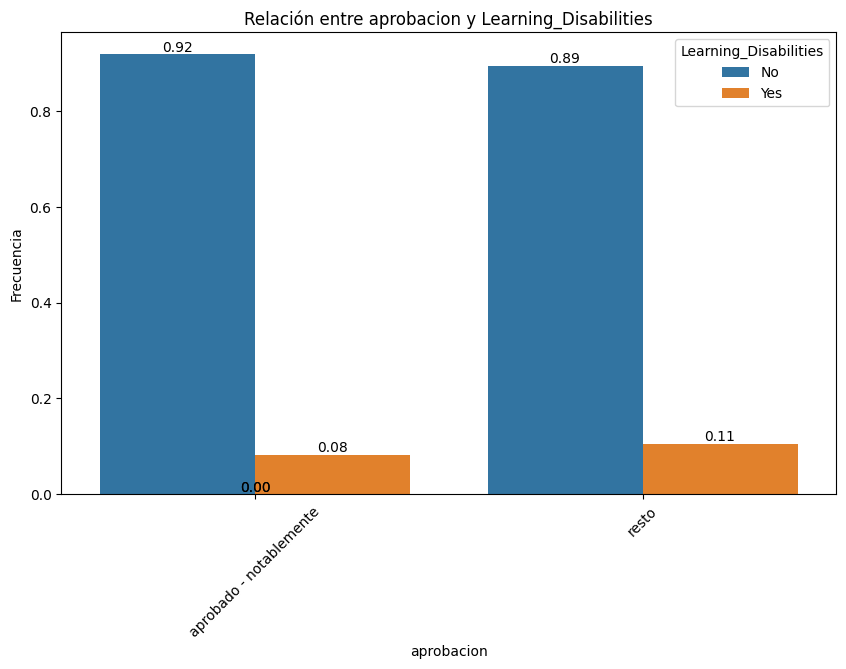

In [157]:
plot_categorical_relationship_fin(student, "aprobacion","Learning_Disabilities", show_values= True, relative_freq= True)

In [179]:
from scipy.stats import mannwhitneyu 
grupo_a = student.loc[student.Learning_Disabilities == "Yes"]["Exam_Score"]
grupo_b = student.loc[student.Learning_Disabilities == "No"]["Exam_Score"]

u_stat, p_valor = mannwhitneyu(grupo_a, grupo_b)

print("Estadístico U:", u_stat)
print("Valor p:", p_valor)

Estadístico U: 1681298.0
Valor p: 3.410898972543289e-15


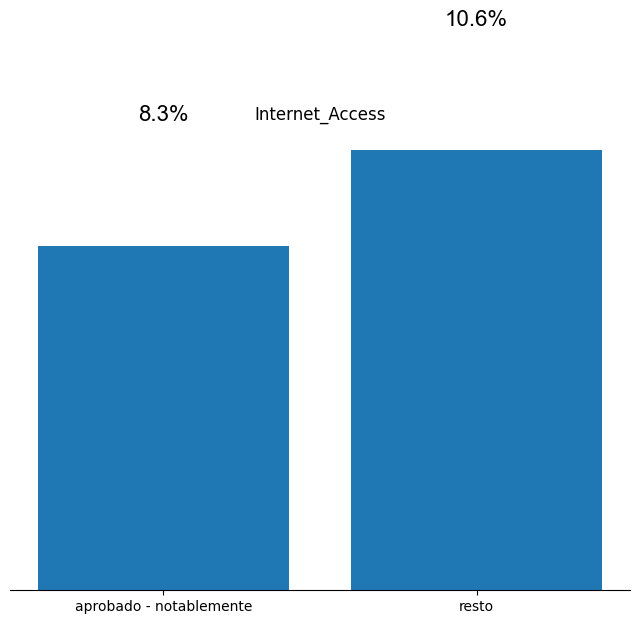

In [216]:
tabla_cont = pd.crosstab(student["Learning_Disabilities"],student["aprobacion"]).T
tabla_cont["Yes"] = (tabla_cont["Yes"]/(tabla_cont["Yes"] + tabla_cont["No"])).round(3) * 100
tabla_cont["No"] = (tabla_cont["No"]/(tabla_cont["Yes"] + tabla_cont["No"])).round(3) * 100
tabla_cont

fig,ax = plt.subplots(figsize = (8,6))
ax.bar(tabla_cont.sort_values("Yes").index.to_list(), height = tabla_cont.sort_values("Yes").Yes.to_list())
ax.yaxis.set_visible(False)
for spine in ["left","right","top"]:
     ax.spines[spine].set_visible(False)

for categoria in ["resto","aprobado - notablemente"]:
    valor = tabla_cont.loc[categoria, "Yes"]
    ax.text(categoria, valor+ 3, f"{round(valor,2)}%", ha = "center", fontdict = dict(family= "Arial", size = 16))
    ax.set_title("Internet_Access")

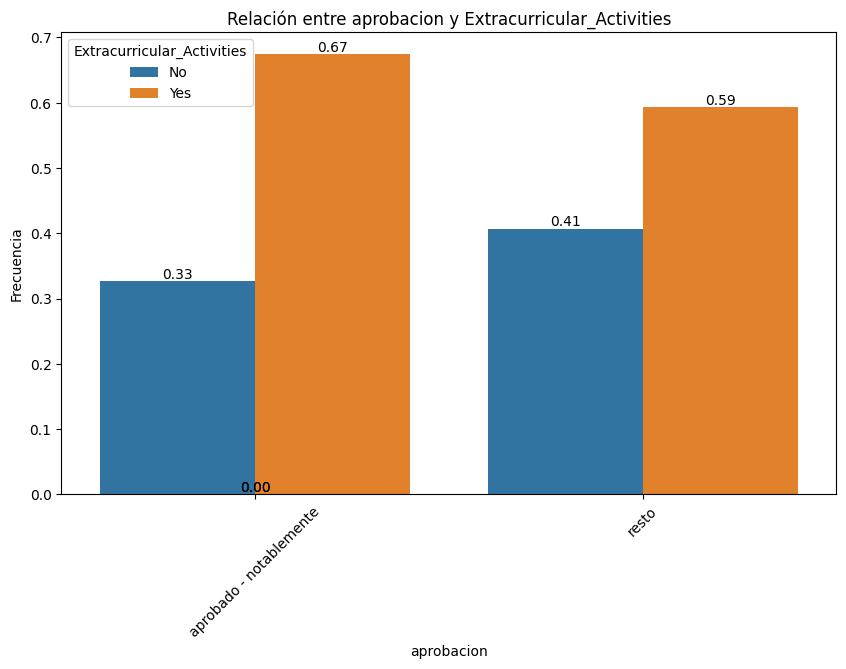

In [158]:
plot_categorical_relationship_fin(student, "aprobacion","Extracurricular_Activities", show_values= True, relative_freq= True)

In [180]:
from scipy.stats import mannwhitneyu 
grupo_a = student.loc[student.Extracurricular_Activities == "Yes"]["Exam_Score"]
grupo_b = student.loc[student.Extracurricular_Activities == "No"]["Exam_Score"]

u_stat, p_valor = mannwhitneyu(grupo_a, grupo_b)

print("Estadístico U:", u_stat)
print("Valor p:", p_valor)

Estadístico U: 5649816.5
Valor p: 1.9240562988081793e-07


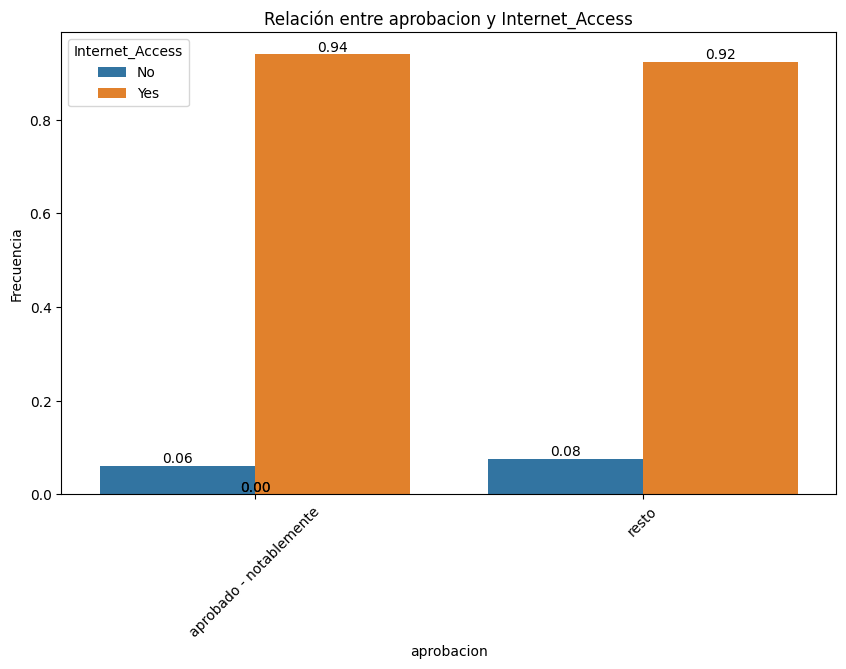

In [159]:
plot_categorical_relationship_fin(student, "aprobacion","Internet_Access", show_values= True, relative_freq= True)

In [181]:
from scipy.stats import mannwhitneyu 
grupo_a = student.loc[student.Internet_Access == "Yes"]["Exam_Score"]
grupo_b = student.loc[student.Internet_Access == "No"]["Exam_Score"]

u_stat, p_valor = mannwhitneyu(grupo_a, grupo_b)

print("Estadístico U:", u_stat)
print("Valor p:", p_valor)

Estadístico U: 1730783.5
Valor p: 4.009168741360511e-07


In [211]:
tabla_cont = pd.crosstab(student["Internet_Access"],student["aprobacion"]).T
tabla_cont["Yes"] = (tabla_cont["Yes"]/(tabla_cont["Yes"] + tabla_cont["No"])).round(3) * 100
tabla_cont["No"] = (tabla_cont["No"]/(tabla_cont["Yes"] + tabla_cont["No"])).round(3) * 100
tabla_cont

Internet_Access,No,Yes
aprobacion,,
aprobado - notablemente,13.0,93.9
resto,84.0,92.4


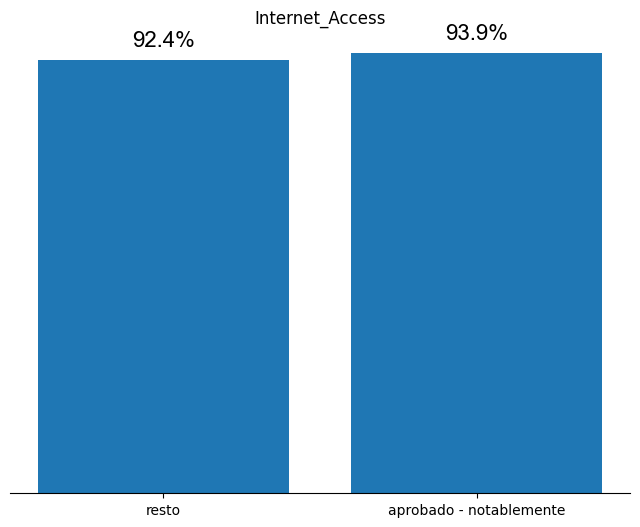

In [215]:
fig,ax = plt.subplots(figsize = (8,6))
ax.bar(tabla_cont.sort_values("Yes").index.to_list(), height = tabla_cont.sort_values("Yes").Yes.to_list())
ax.yaxis.set_visible(False)
for spine in ["left","right","top"]:
     ax.spines[spine].set_visible(False)

for categoria in ["resto","aprobado - notablemente"]:
    valor = tabla_cont.loc[categoria, "Yes"]
    ax.text(categoria, valor+ 3, f"{round(valor,2)}%", ha = "center", fontdict = dict(family= "Arial", size = 16))
    ax.set_title("Internet_Access")

In [182]:
# con otras categoricas no bianrias.

def plot_grouped_boxplots(df, cat_col, num_col):
    unique_cats = df[cat_col].unique()
    num_cats = len(unique_cats)
    group_size = 5

    for i in range(0, num_cats, group_size):
        subset_cats = unique_cats[i:i+group_size]
        subset_df = df[df[cat_col].isin(subset_cats)]
        
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=cat_col, y=num_col, data=subset_df)
        plt.title(f'Boxplots of {num_col} for {cat_col} (Group {i//group_size + 1})')
        plt.xticks(rotation=45)
        plt.show()

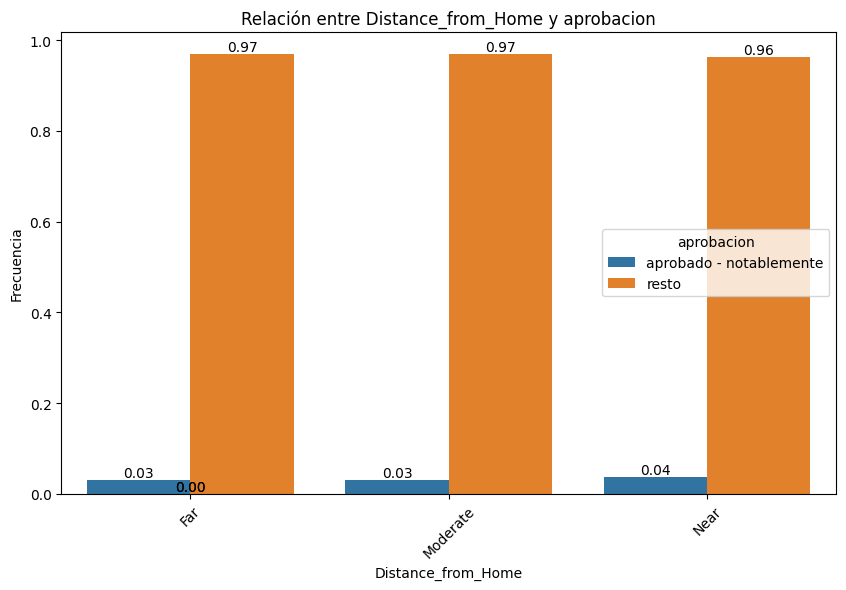

In [161]:
plot_categorical_relationship_fin(student, "Distance_from_Home","aprobacion", show_values= True, relative_freq= True)

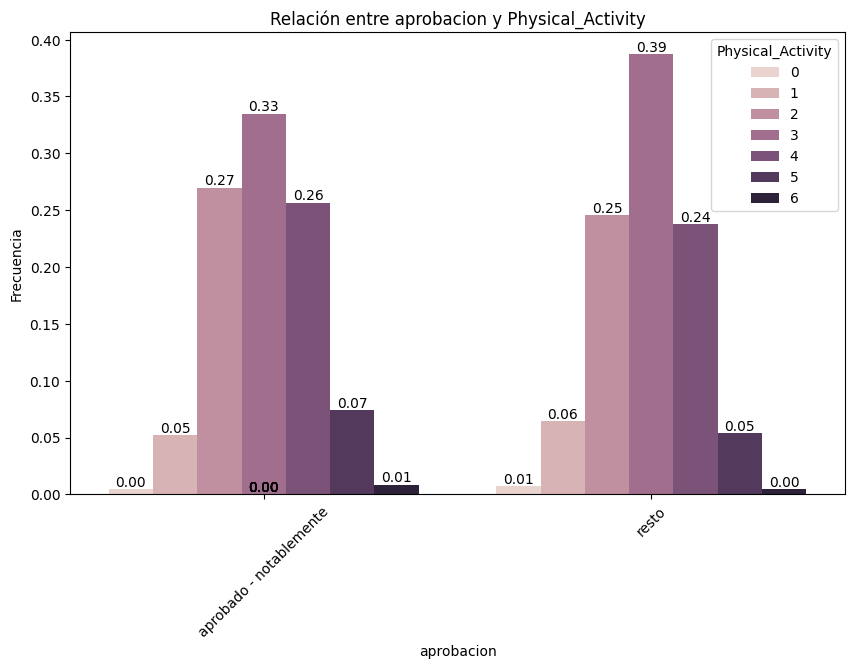

In [163]:
plot_categorical_relationship_fin(student, "aprobacion","Physical_Activity", show_values= True, relative_freq= True)

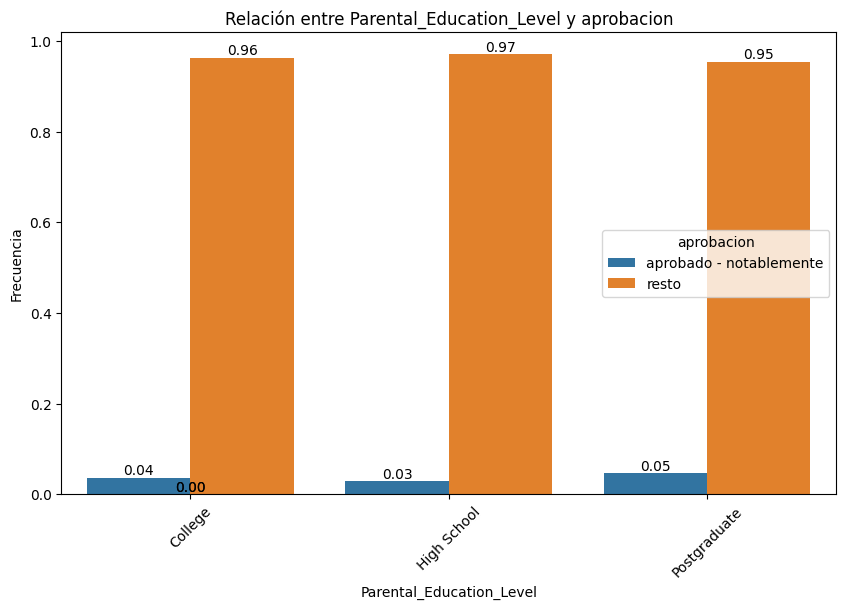

In [164]:
plot_categorical_relationship_fin(student, "Parental_Education_Level","aprobacion", show_values= True, relative_freq= True)

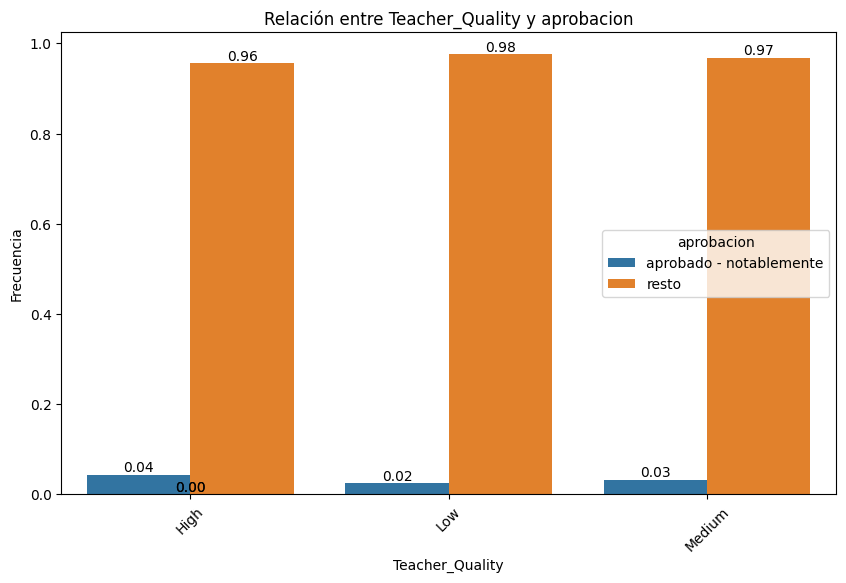

In [165]:
plot_categorical_relationship_fin(student, "Teacher_Quality","aprobacion", show_values= True, relative_freq= True)

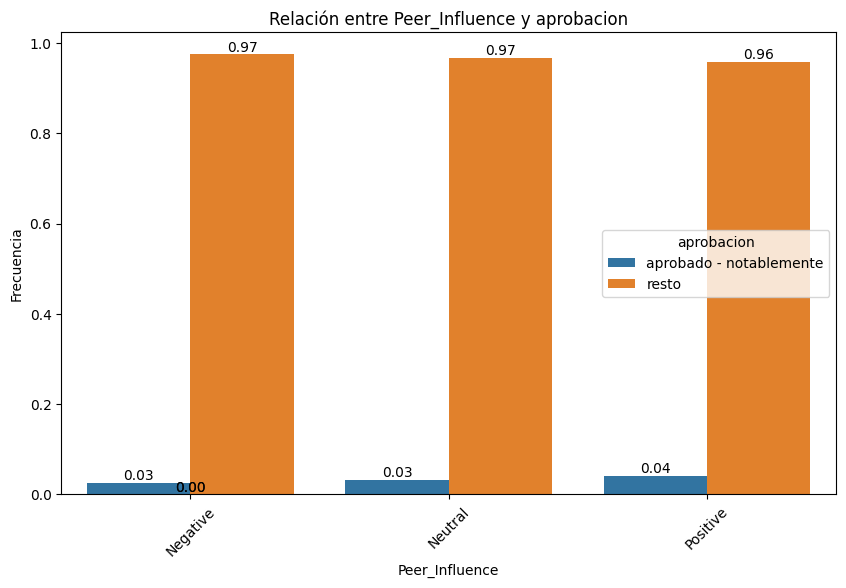

In [166]:
plot_categorical_relationship_fin(student, "Peer_Influence","aprobacion", show_values= True, relative_freq= True)

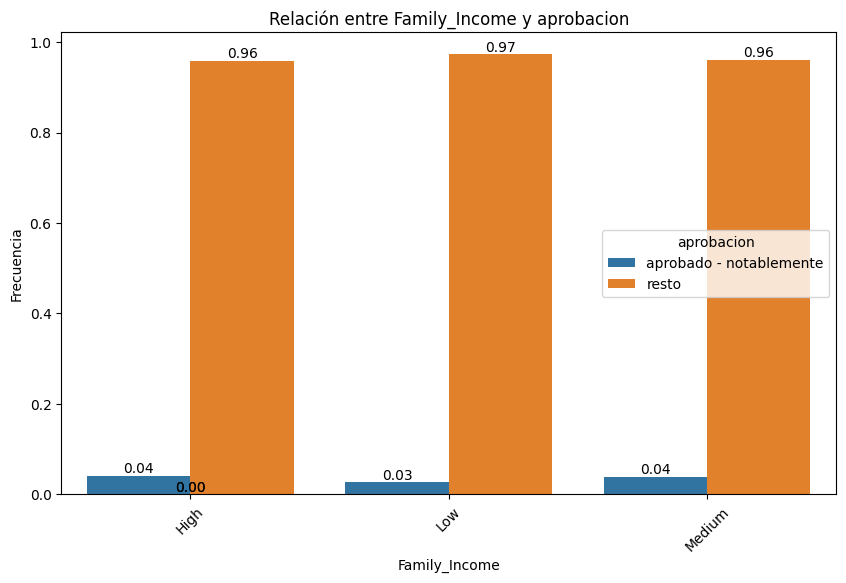

In [167]:
plot_categorical_relationship_fin(student, "Family_Income","aprobacion", show_values= True, relative_freq= True)

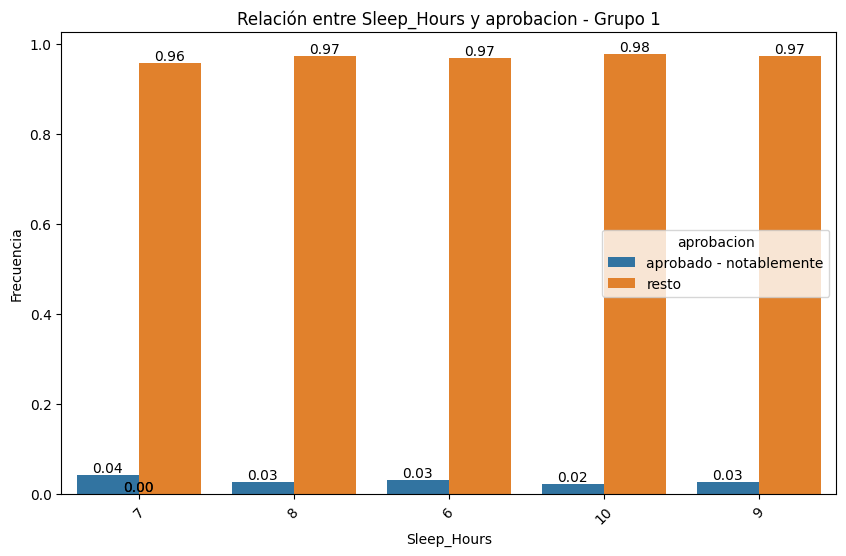

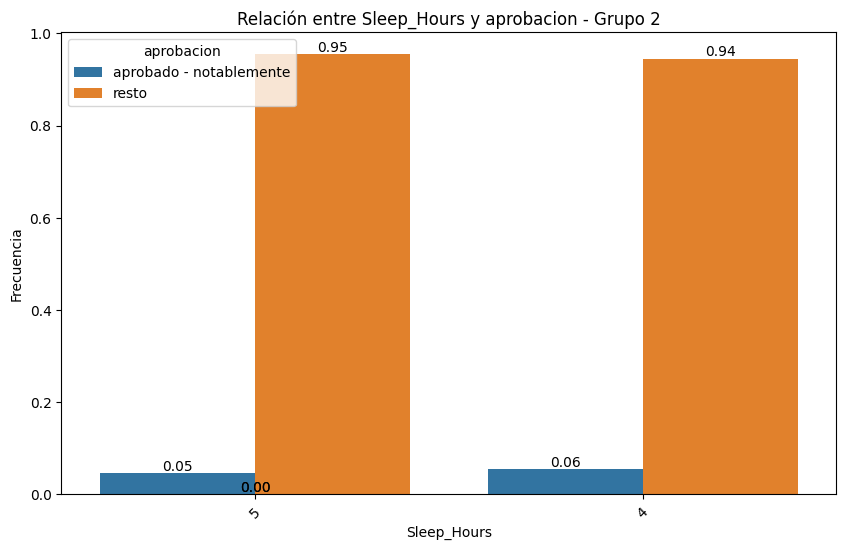

In [168]:
plot_categorical_relationship_fin(student, "Sleep_Hours","aprobacion", show_values= True, relative_freq= True)

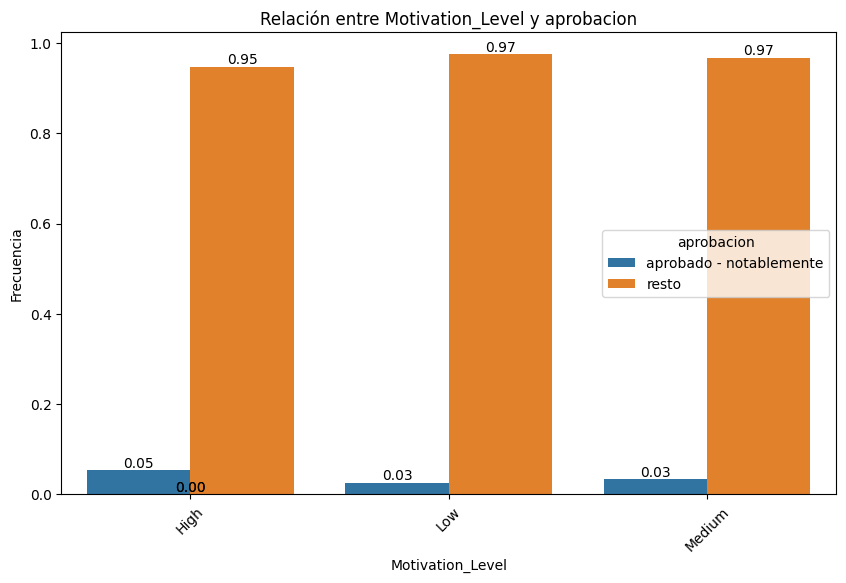

In [169]:
plot_categorical_relationship_fin(student, "Motivation_Level","aprobacion", show_values= True, relative_freq= True)

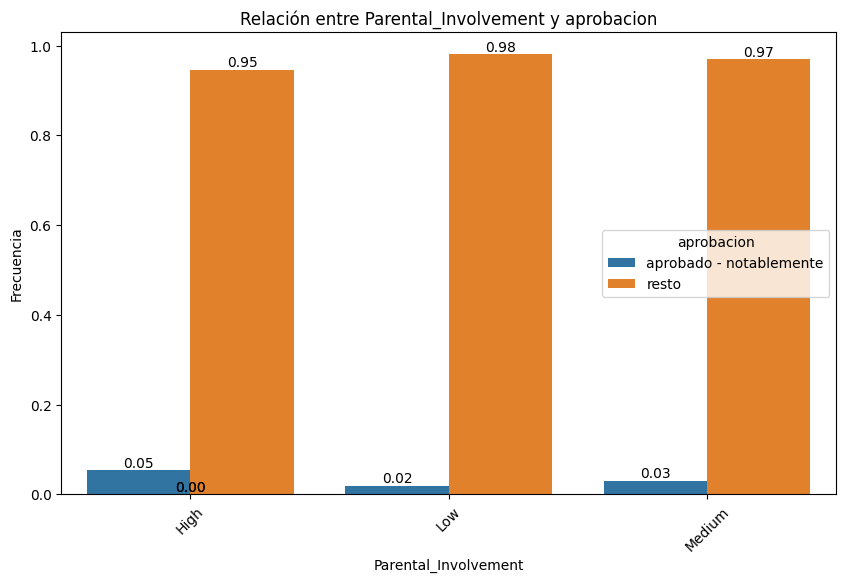

In [170]:
plot_categorical_relationship_fin(student, "Parental_Involvement","aprobacion", show_values= True, relative_freq= True)

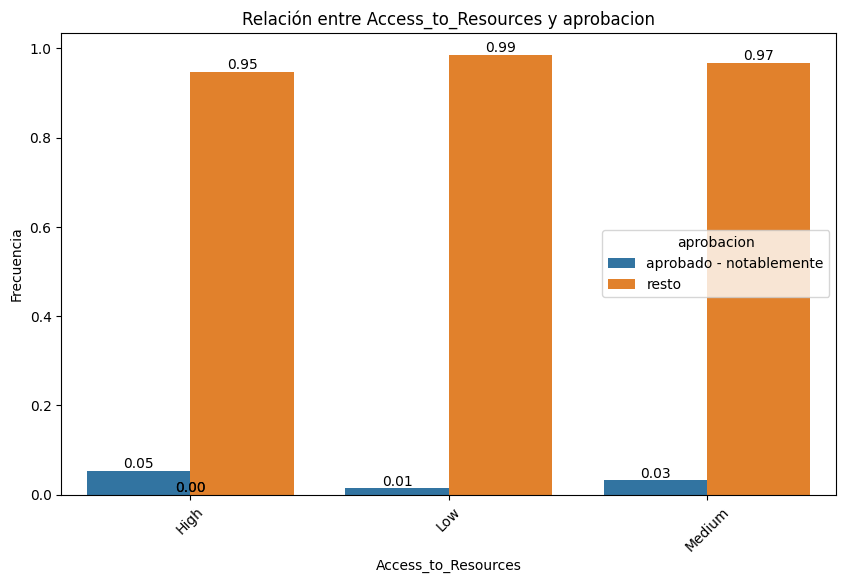

In [171]:
plot_categorical_relationship_fin(student, "Access_to_Resources","aprobacion", show_values= True, relative_freq= True)

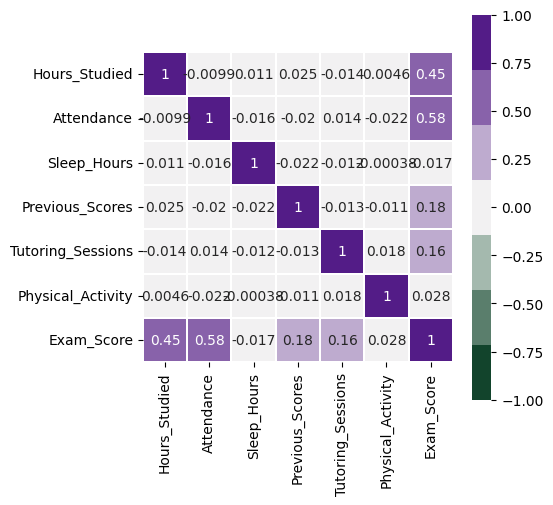

In [184]:
matriz_corr = student.corr(numeric_only= True)
plt.figure(figsize=(5,5))
sns.heatmap(matriz_corr,
            vmin=-1,  #extremos de colores
            vmax=1,  #extremos de colores
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),  # paleta de colores
            square=True, #para que sea cuadrada
            linewidths=.1,
            annot=True); #para que ponga los numeros

plt.savefig("./Imagenes/Creadas/sorprendente_scorepboxplot4.png")

In [ ]:
# se trata de las correlaciones que habiamos identificado anteriormente pero no se pueden considerar estatisticemente significativas.

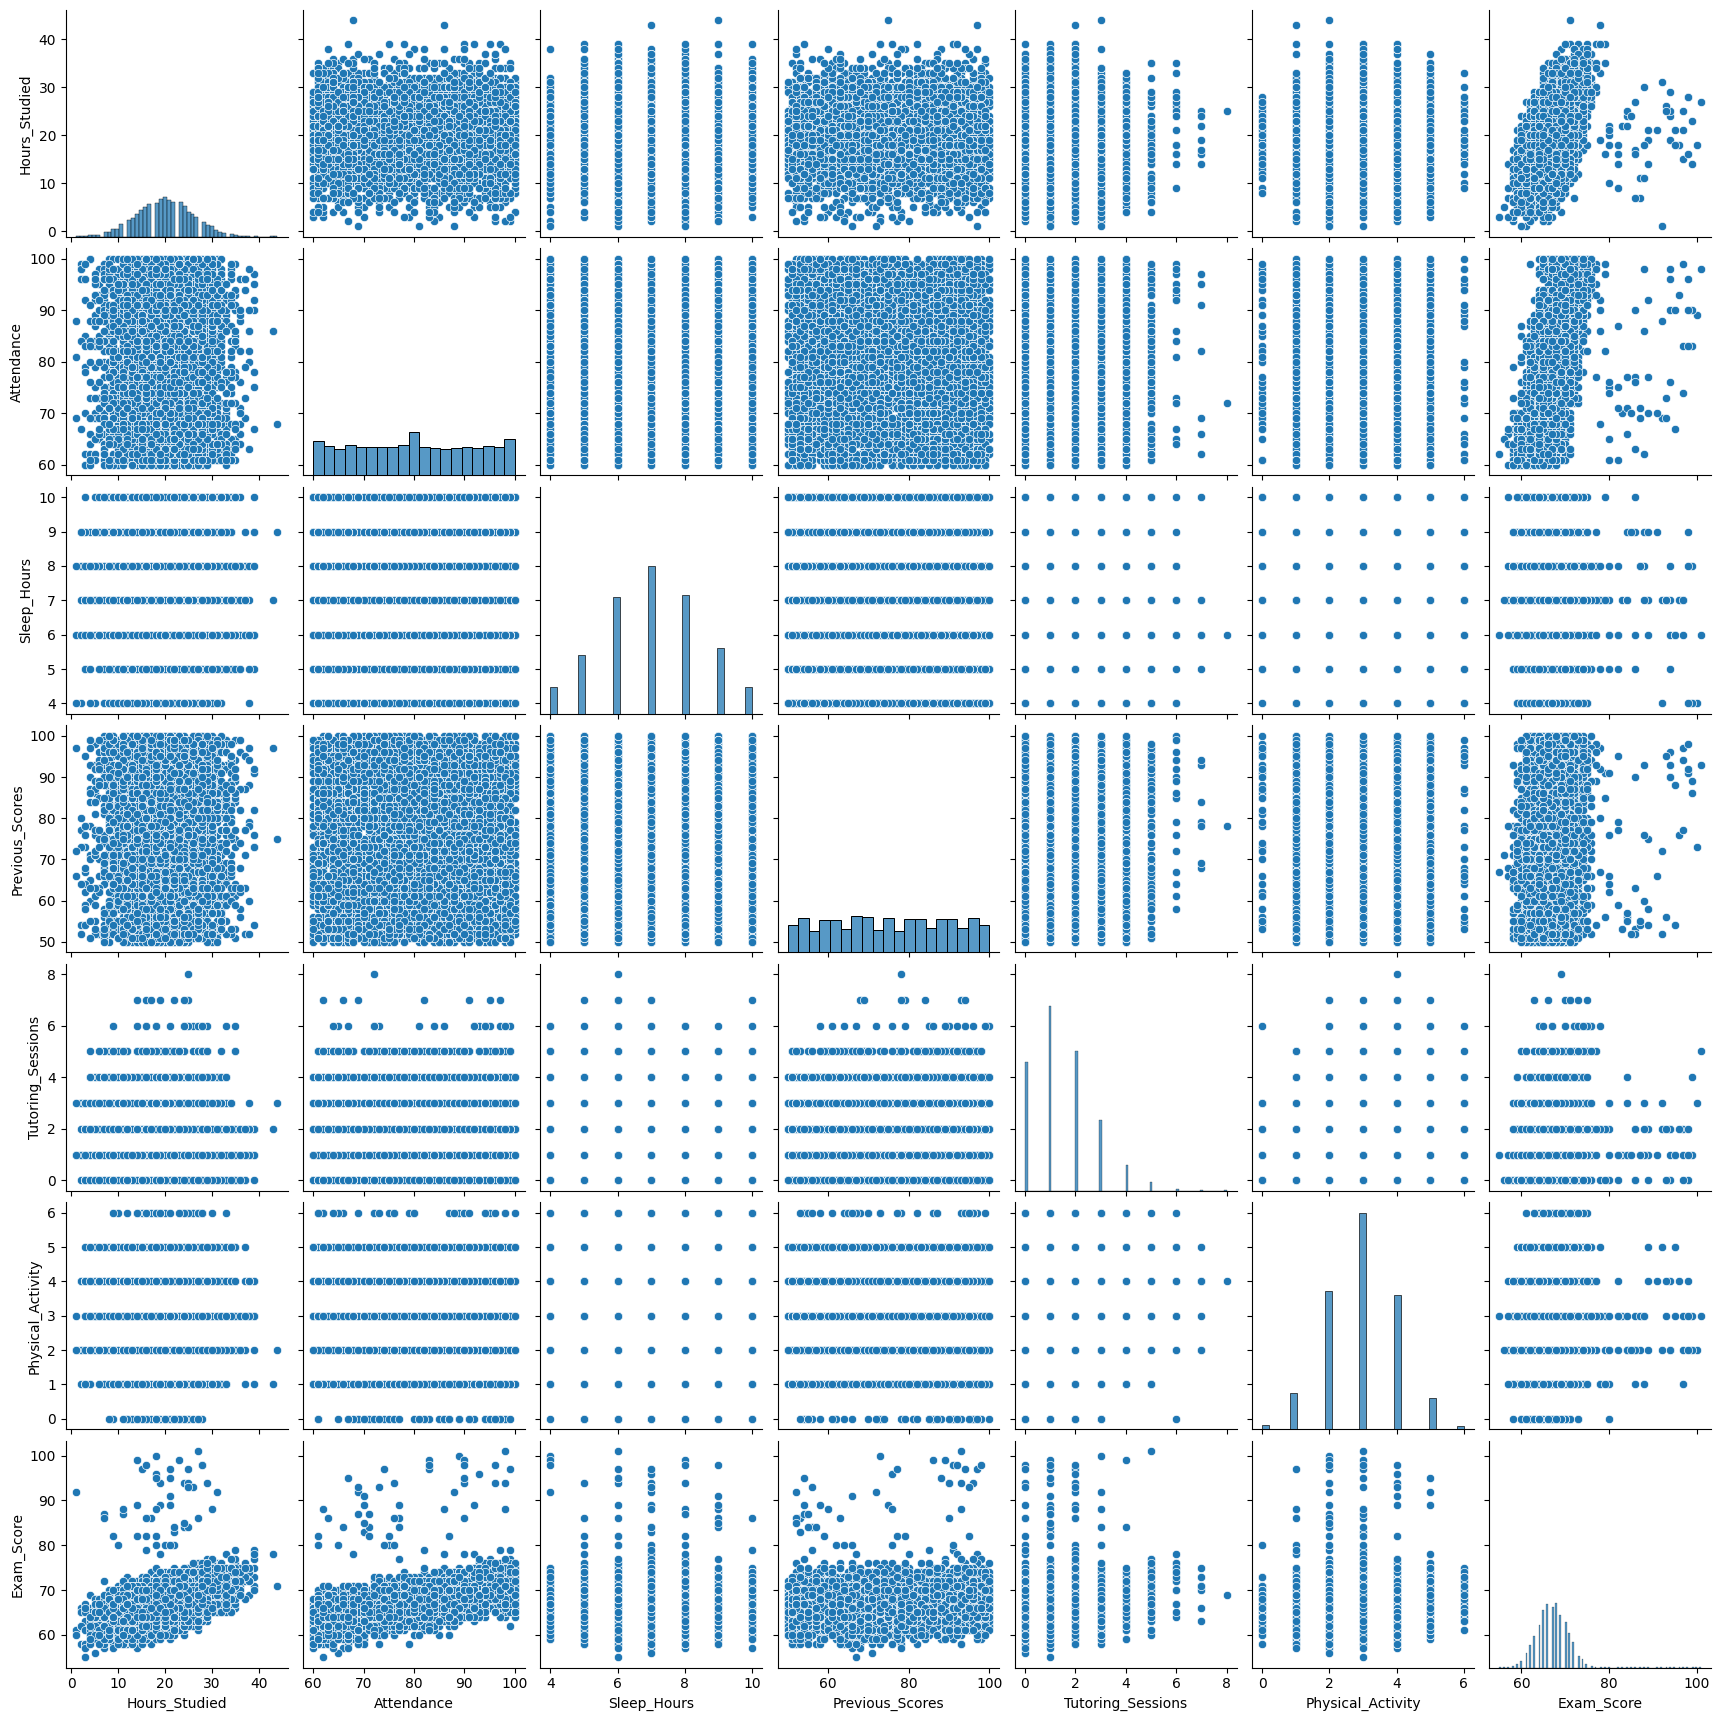

In [185]:
sns.pairplot(student);

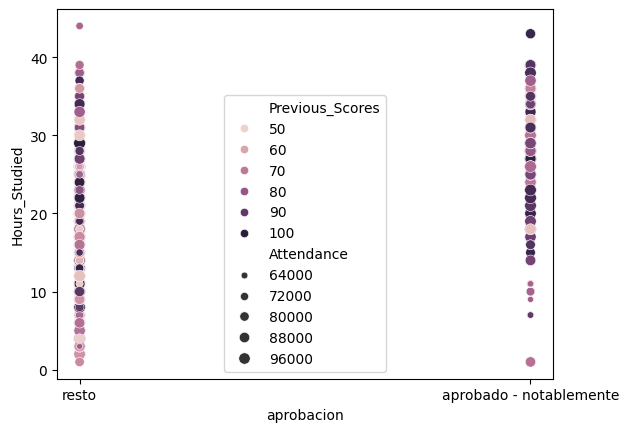

In [186]:
sns.scatterplot(x="aprobacion", y= "Hours_Studied", size = student["Attendance"]*1000, data = student, hue= "Previous_Scores");

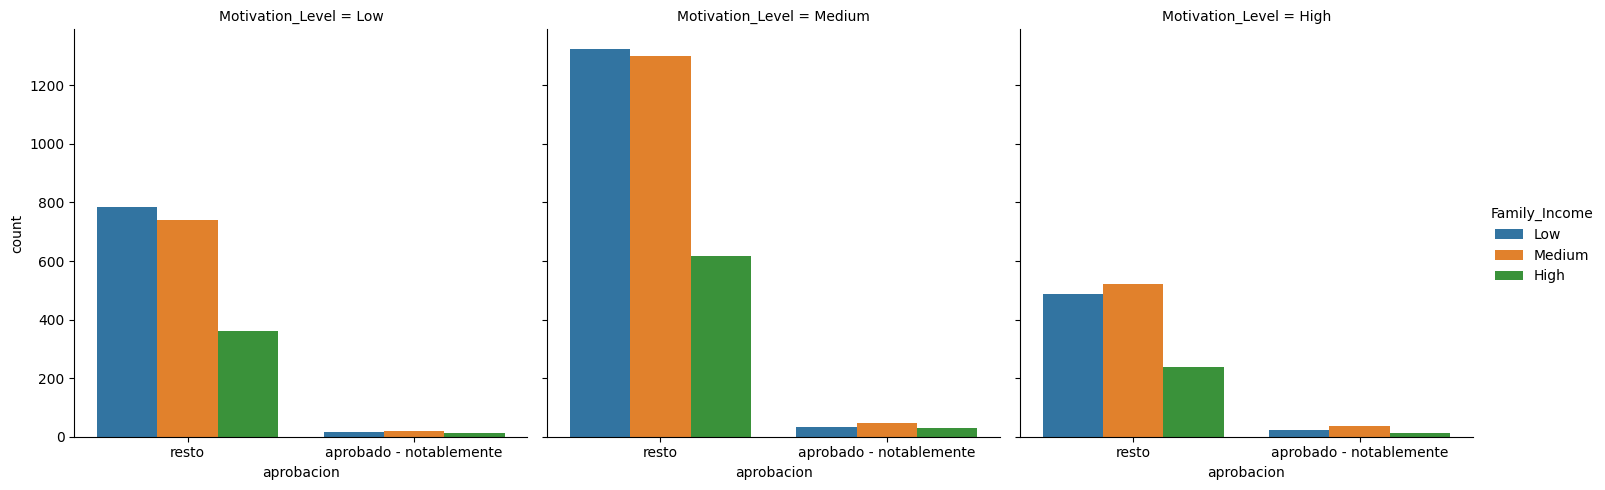

In [187]:
# entre categoricas
sns.catplot(x= "aprobacion", col = "Motivation_Level", hue = "Family_Income", data = student, kind = "count");

In [189]:
df_notable = student.loc[student["aprobacion"]=="aprobado - notablemente"]
df_notable.info()

<class 'pandas.core.frame.DataFrame'>
Index: 230 entries, 2 to 6566
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               230 non-null    int64 
 1   Attendance                  230 non-null    int64 
 2   Parental_Involvement        230 non-null    object
 3   Access_to_Resources         230 non-null    object
 4   Extracurricular_Activities  230 non-null    object
 5   Sleep_Hours                 230 non-null    int64 
 6   Previous_Scores             230 non-null    int64 
 7   Motivation_Level            230 non-null    object
 8   Internet_Access             230 non-null    object
 9   Tutoring_Sessions           230 non-null    int64 
 10  Family_Income               230 non-null    object
 11  Teacher_Quality             230 non-null    object
 12  School_Type                 230 non-null    object
 13  Peer_Influence              230 non-null    object
 14

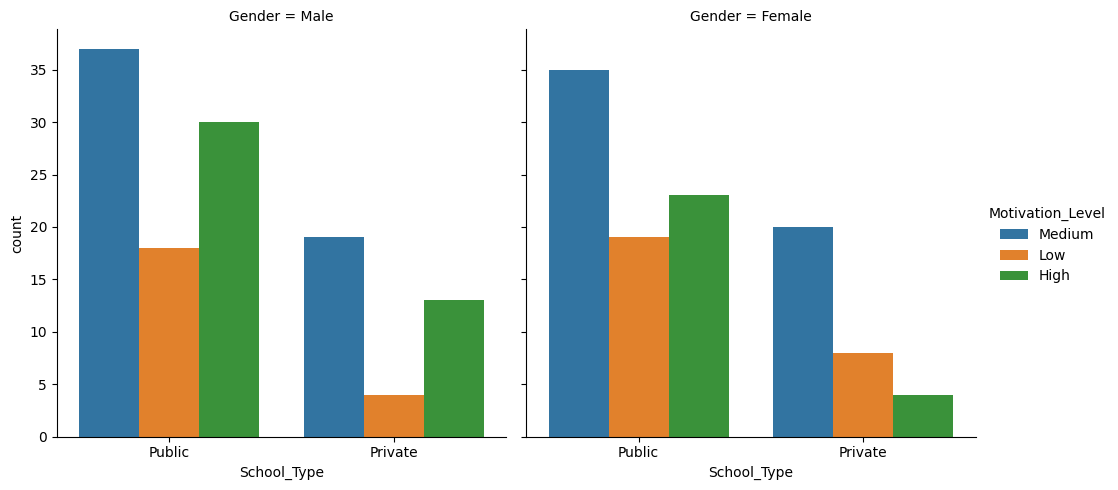

In [190]:
sns.catplot(x= "School_Type", col = "Gender", hue = "Motivation_Level", data = df_notable, kind = "count");


#en el privado las niñas son mas motivadas que en el publico

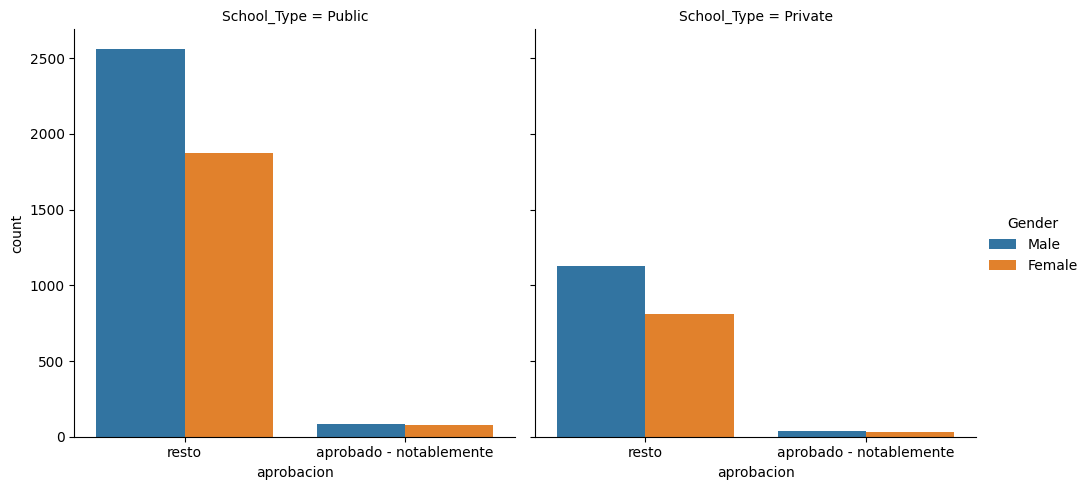

In [191]:
sns.catplot(x= "aprobacion", col = "School_Type", hue = "Gender", data = student, kind = "count");

In [193]:
tabla_contingencia = pd.crosstab(student["School_Type"],student["aprobacion"]).T
tabla_contingencia["Private"] = (tabla_contingencia["Private"]/(tabla_contingencia["Private"] + tabla_contingencia["Public"])).round(3) * 100
tabla_contingencia["Public"] = (tabla_contingencia["Public"]/(tabla_contingencia["Private"] + tabla_contingencia["Public"])).round(3) * 100
tabla_contingencia

School_Type,Private,Public
aprobacion,,
aprobado - notablemente,29.6,84.6
resto,30.4,99.3


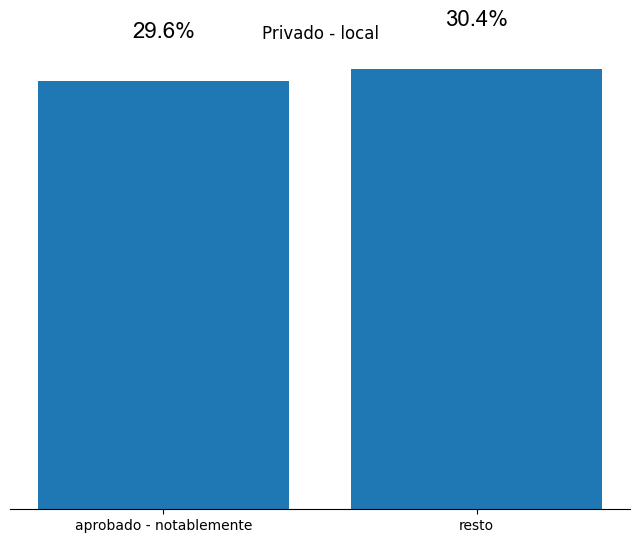

In [196]:
fig,ax = plt.subplots(figsize = (8,6))
ax.bar(tabla_contingencia.sort_values("Private").index.to_list(), height = tabla_contingencia.sort_values("Private").Private.to_list())
ax.yaxis.set_visible(False)
for spine in ["left","right","top"]:
     ax.spines[spine].set_visible(False)

for categoria in ["resto","aprobado - notablemente"]:
    valor = tabla_contingencia.loc[categoria, "Private"]
    ax.text(categoria, valor+ 3, f"{round(valor,2)}%", ha = "center", fontdict = dict(family= "Arial", size = 16))
    ax.set_title("Privado - local")

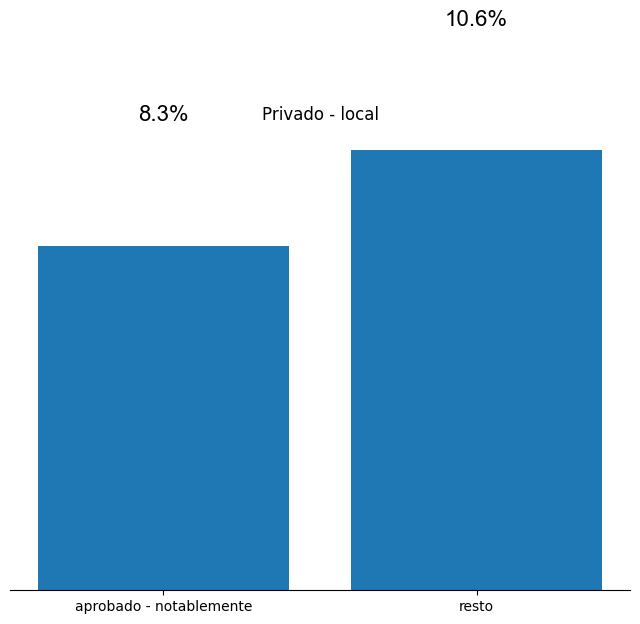

In [198]:

tabla_contingencia1 = pd.crosstab(student["Learning_Disabilities"],student["aprobacion"]).T
tabla_contingencia1["Yes"] = (tabla_contingencia1["Yes"]/(tabla_contingencia1["Yes"] + tabla_contingencia1["No"])).round(3) * 100
tabla_contingencia1["No"] = (tabla_contingencia1["No"]/(tabla_contingencia1["No"] + tabla_contingencia1["Yes"])).round(3) * 100



fig,ax = plt.subplots(figsize = (8,6))
ax.bar(tabla_contingencia1.sort_values("Yes").index.to_list(), height = tabla_contingencia1.sort_values("Yes").Yes.to_list())
ax.yaxis.set_visible(False)
for spine in ["left","right","top"]:
     ax.spines[spine].set_visible(False)

for categoria in ["resto","aprobado - notablemente"]:
    valor = tabla_contingencia1.loc[categoria, "Yes"]
    ax.text(categoria, valor+ 3, f"{round(valor,2)}%", ha = "center", fontdict = dict(family= "Arial", size = 16))
    ax.set_title("Privado - local")

In [ ]:
bin_student= student.loc[student["aprobacion"].isin(["aprobado - notablemente"])]
bin_student

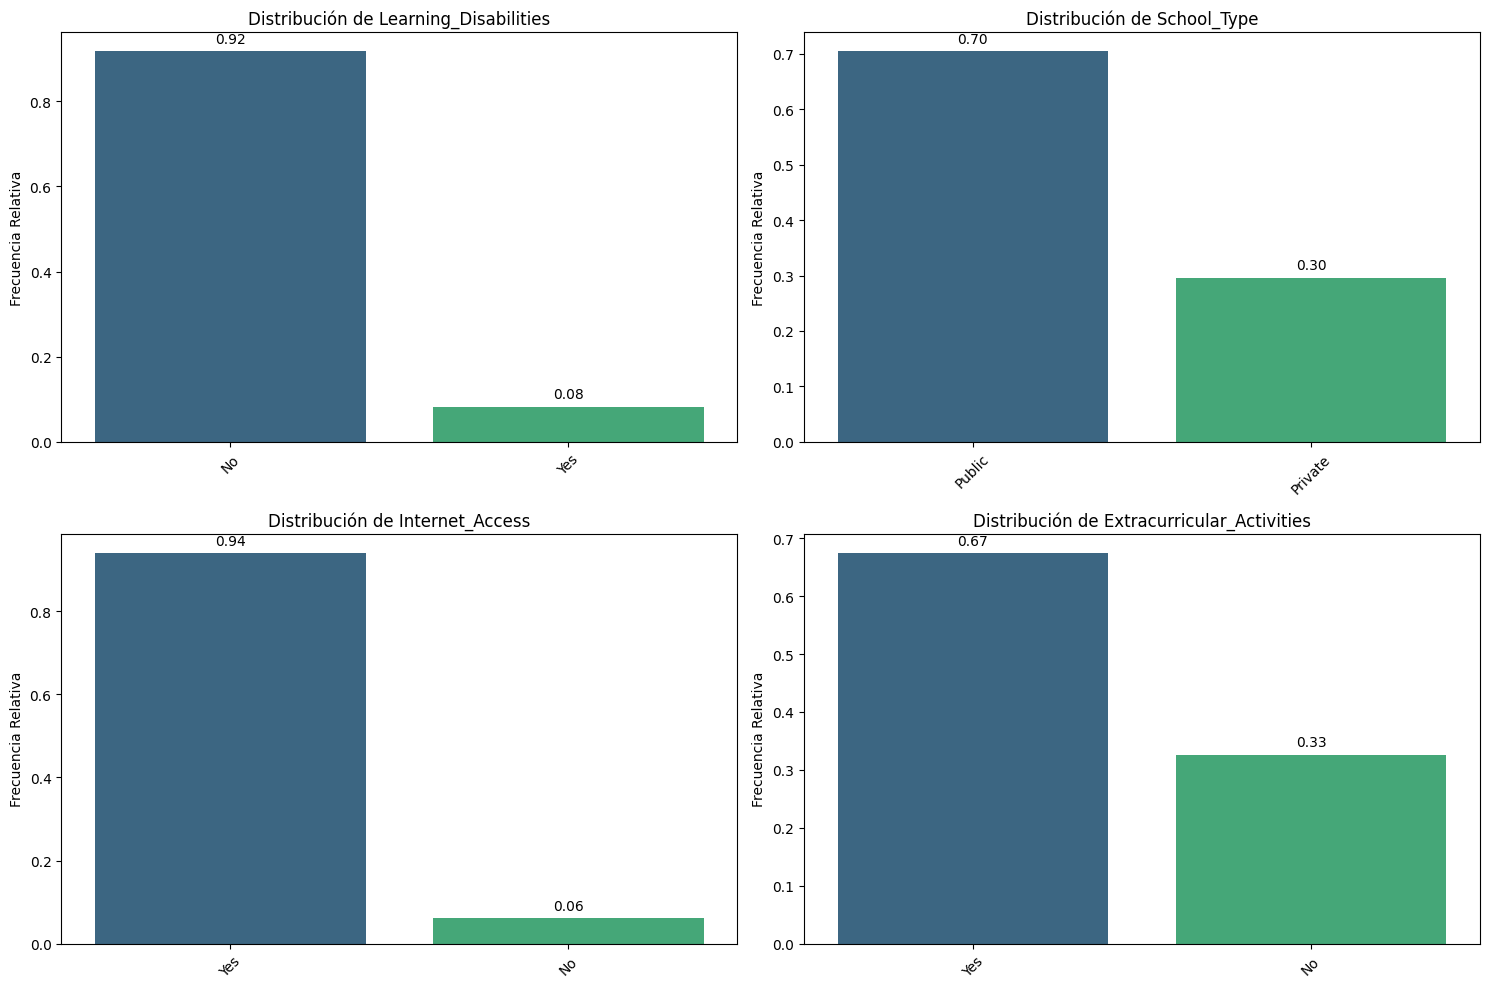

In [222]:
pinta_distribucion_categoricas (bin_student,binarias)